In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/content/UCI_Credit_Card.csv")

In [3]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Data Exploration

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [5]:
data[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


In [6]:
data[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [7]:
data[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [8]:
data[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


# Data Cleaning

In [9]:
data.rename(columns={"default.payment.next.month": "def_pay",
                    'PAY_0': 'PAY_1'}, inplace=True)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [11]:
data['EDUCATION'] = data['EDUCATION'].apply(lambda x: 4 if x in [0, 5, 6] else x)

In [12]:
data['MARRIAGE'] = data['MARRIAGE'].replace(0, 3)

In [13]:
def replace_to_zero(col):
    fil = (data[col] == -2) | (data[col] == -1) | (data[col] == 0)
    data.loc[fil, col] = 0

for i in ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    replace_to_zero(i)

# Exploratory Data Analysis (EDA)

The percentage of defaulters in the data is 22.12 %


[]

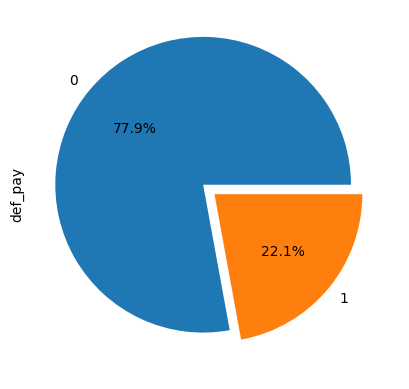

In [14]:
perc_default = data.def_pay.sum() / len(data.def_pay)
print(f'The percentage of defaulters in the data is {perc_default*100} %')
data['def_pay'].value_counts().plot(kind='pie',explode=[0.1,0],autopct="%1.1f%%")
plt.plot()

 Payment Status (PAY_X)

In [15]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 10))
    for i, var_name in enumerate(variables):
        row = i // n_cols
        col = i % n_cols
        sns.histplot(data=df, x=var_name, bins=n_bins, ax=axes[row, col])
        axes[row, col].set_title(var_name)
    fig.tight_layout()
    plt.show()

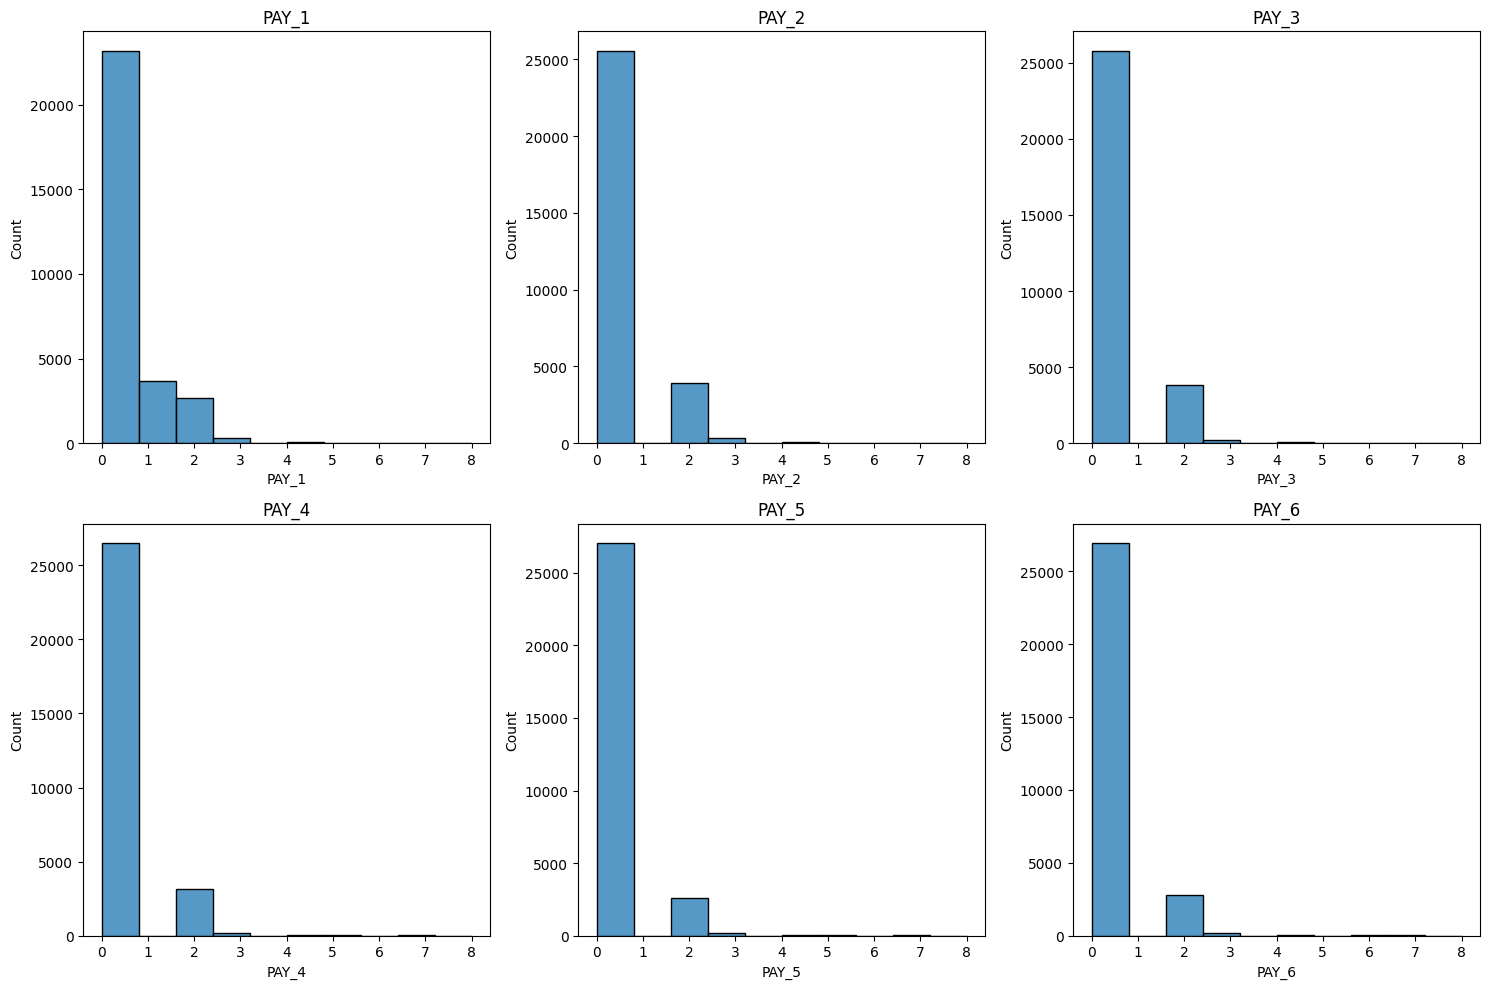

In [16]:
late = data[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

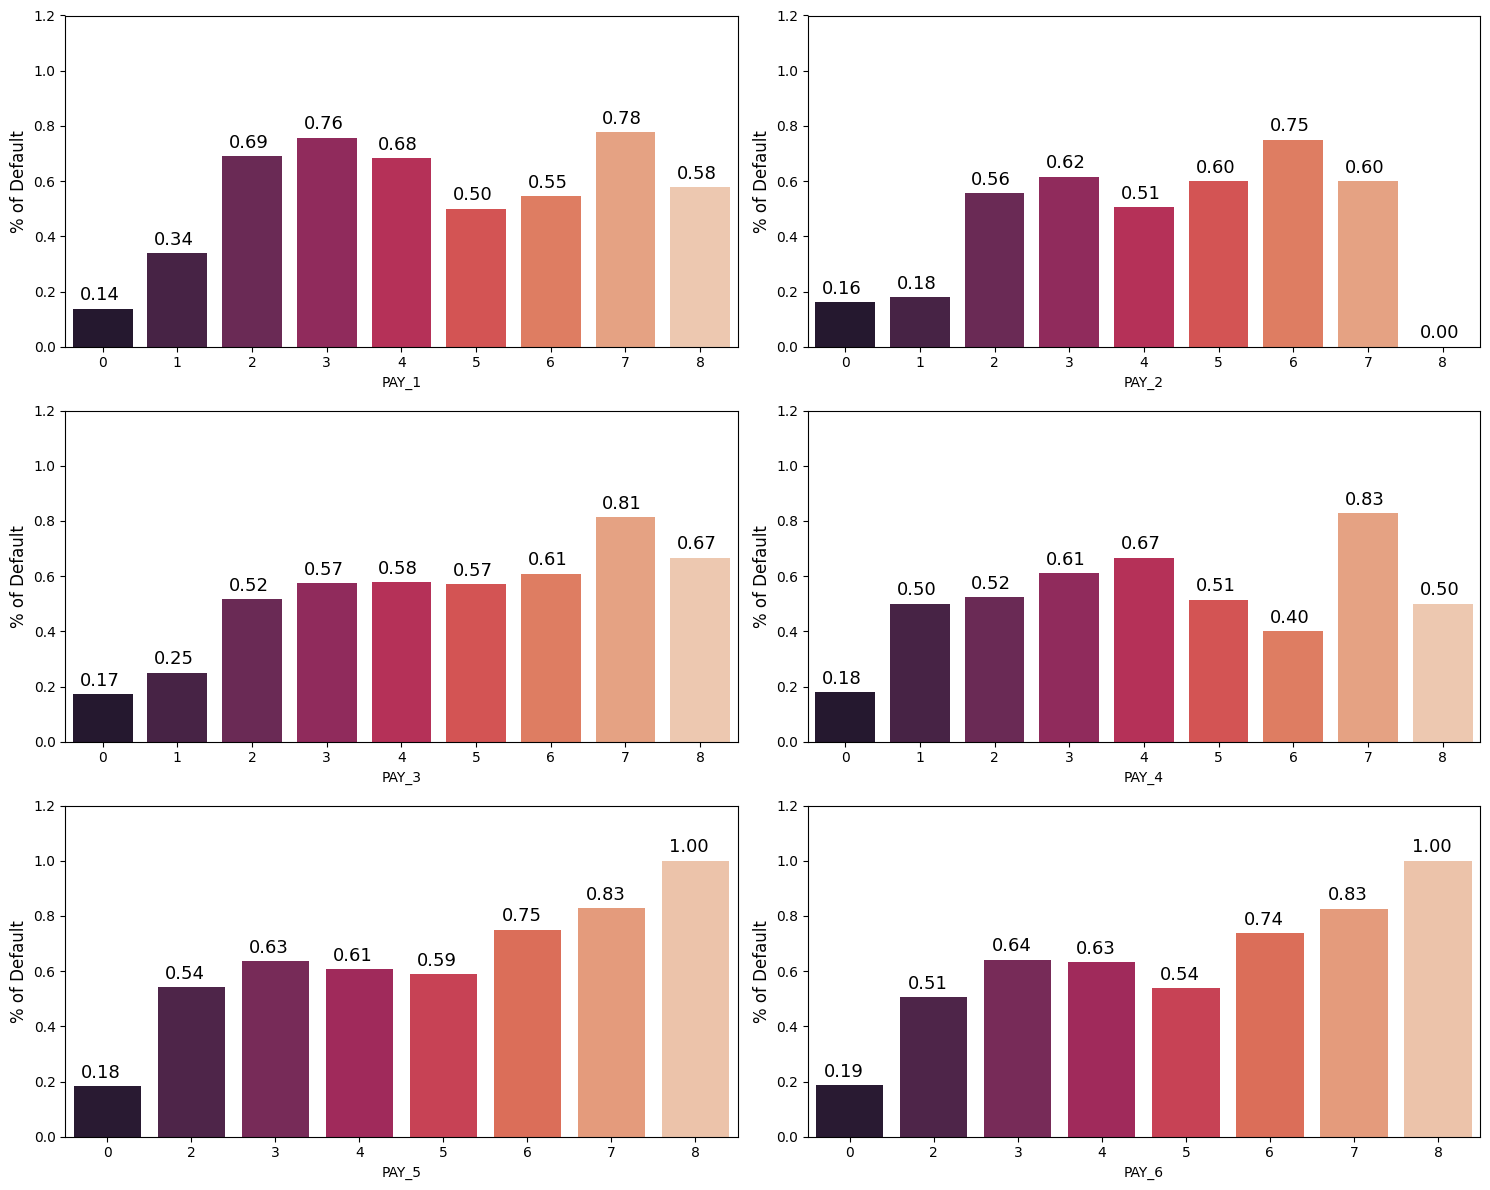

In [17]:
pay_x_fts = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_x_fts):
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "def_pay", data = data, palette = 'rocket', errorbar = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,1.2)
    plt.tight_layout()

    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.09, p.get_height()+0.03),fontsize=13)

plt.show()

Amount of Bill Statement (BILL_AMTX)

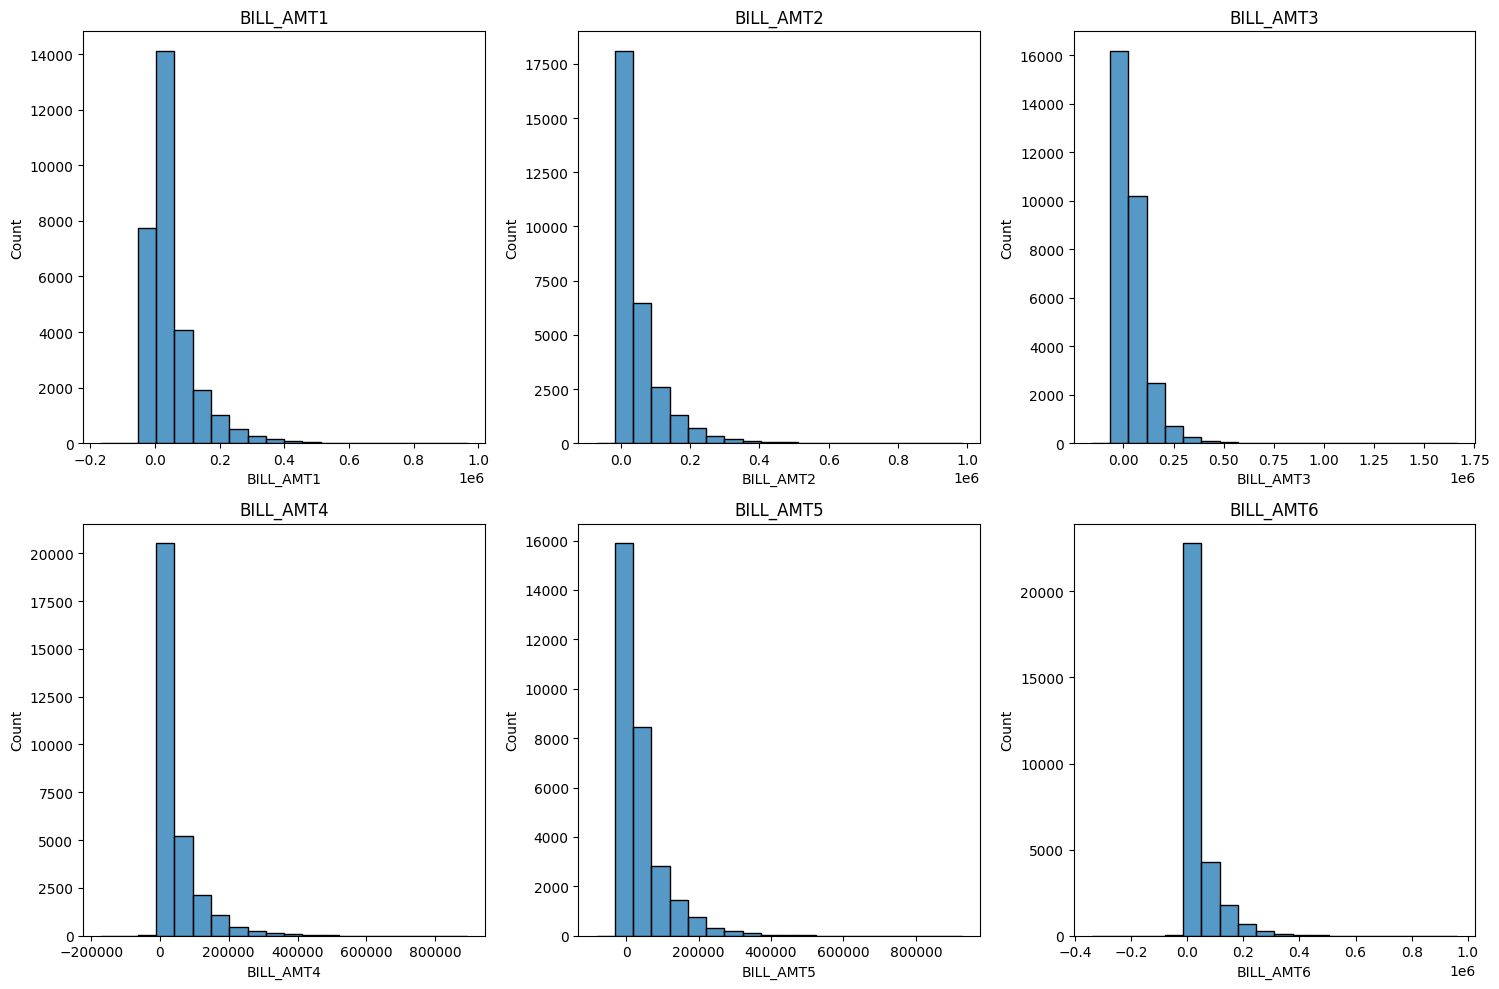

In [18]:
bill_amtx_fts = ['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
bills = data[bill_amtx_fts]
draw_histograms(bills, bills.columns, 2, 3, 20)

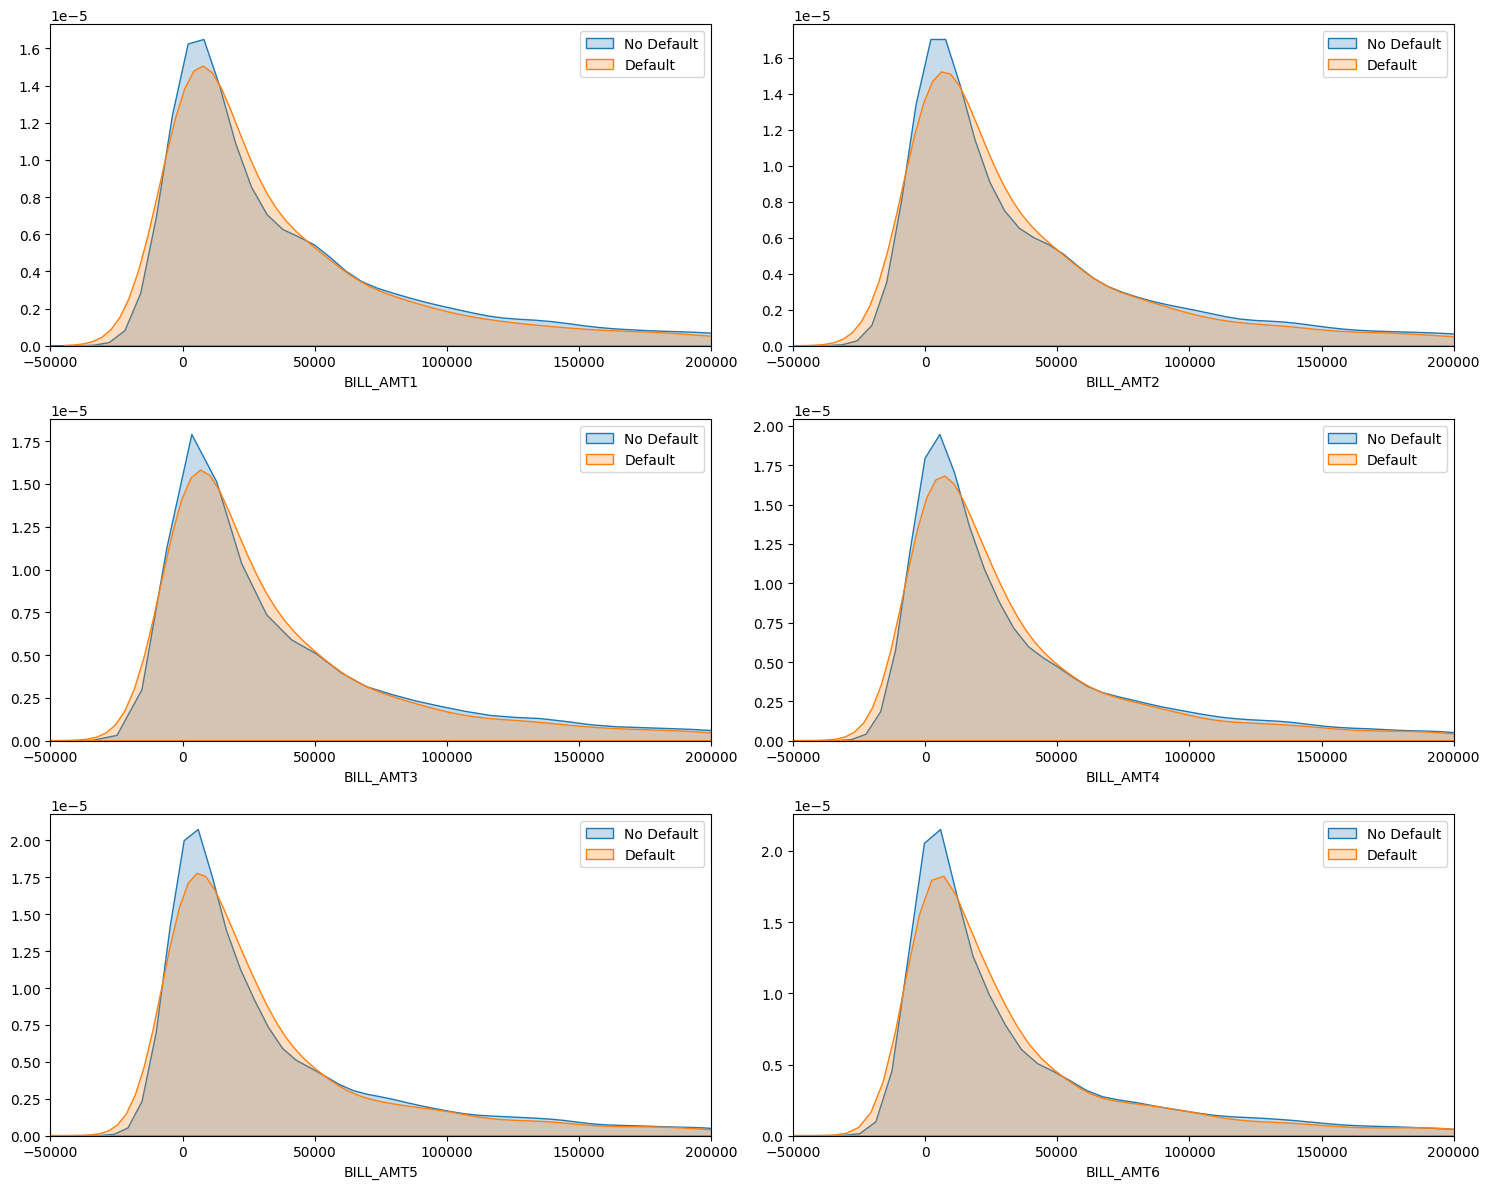

In [19]:
plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_fts):
    plt.subplot(3,2,i + 1)
    sns.kdeplot(data.loc[(data['def_pay'] == 0), col], label = 'No Default',fill = True)
    sns.kdeplot(data.loc[(data['def_pay'] == 1), col], label = 'Default', fill = True)
    plt.xlim(-50000,200000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

plt.show()

In [20]:
data['BILL_AMT1_bin'] = data['BILL_AMT1'].copy()
data['BILL_AMT2_bin'] = data['BILL_AMT2'].copy()
data['BILL_AMT3_bin'] = data['BILL_AMT3'].copy()
data['BILL_AMT4_bin'] = data['BILL_AMT4'].copy()
data['BILL_AMT5_bin'] = data['BILL_AMT5'].copy()
data['BILL_AMT6_bin'] = data['BILL_AMT6'].copy()

In [22]:
bill_amtx_bins = ['BILL_AMT1_bin', 'BILL_AMT2_bin', 'BILL_AMT3_bin', 'BILL_AMT4_bin', 'BILL_AMT5_bin', 'BILL_AMT6_bin']

for i, col in enumerate (bill_amtx_bins):
    data[col] = pd.cut(data[bill_amtx_fts[i]],[-350000,-1,0,25000, 75000, 200000, 2000000])

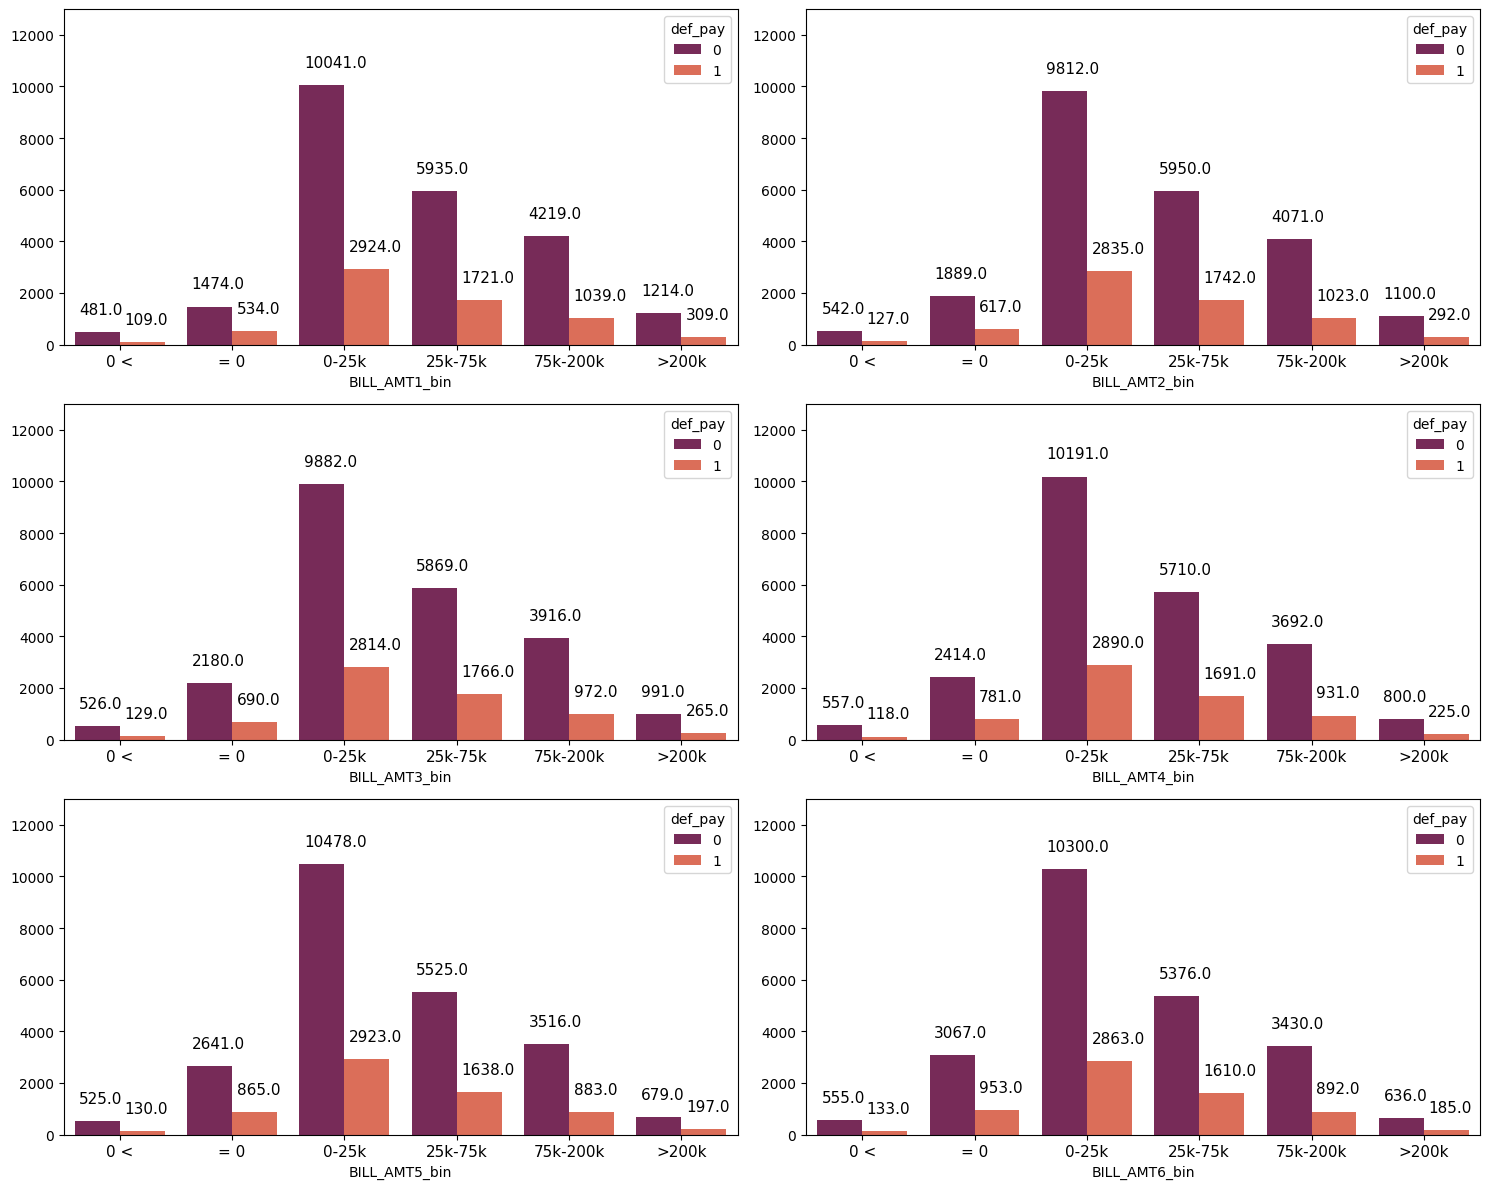

In [24]:
plt.figure(figsize=(15, 12))
for i,col in enumerate(bill_amtx_bins):
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(data = data, x = col, hue="def_pay", palette = 'rocket')
    plt.ylim(0,13000)
    plt.ylabel('')
    plt.xticks([0,1,2,3,4,5],['0 <', '= 0', '0-25k', '25k-75k', '75k-200k', '>200k'], fontsize = 11)
    plt.tight_layout()

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.04, p.get_height()+700), fontsize = 11)

plt.show()

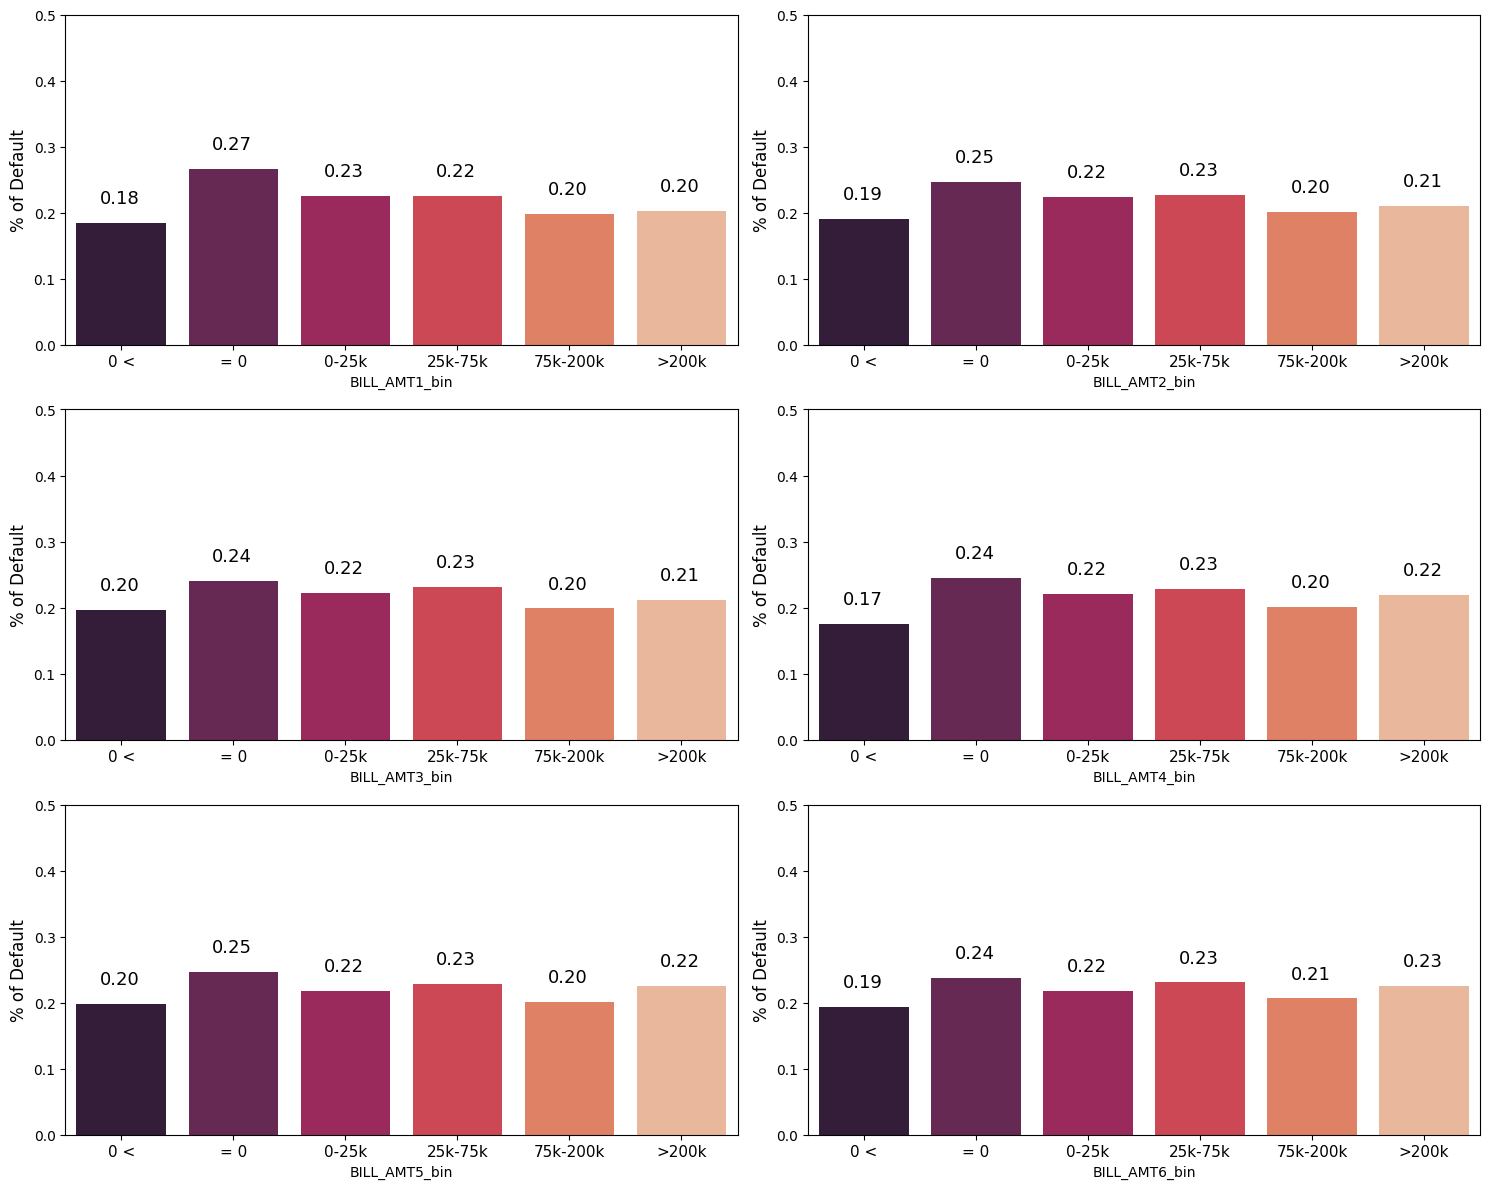

In [25]:
plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_bins):
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "def_pay", data = data, palette = 'rocket', errorbar = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,0.5)
    plt.xticks([0,1,2,3,4,5],['0 <', '= 0', '0-25k', '25k-75k', '75k-200k', '>200k'], fontsize = 11)
    plt.tight_layout()

    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.21, p.get_height()+0.03),fontsize=13)

plt.show()

 Amount of Previous Payment (PAY_AMTX)

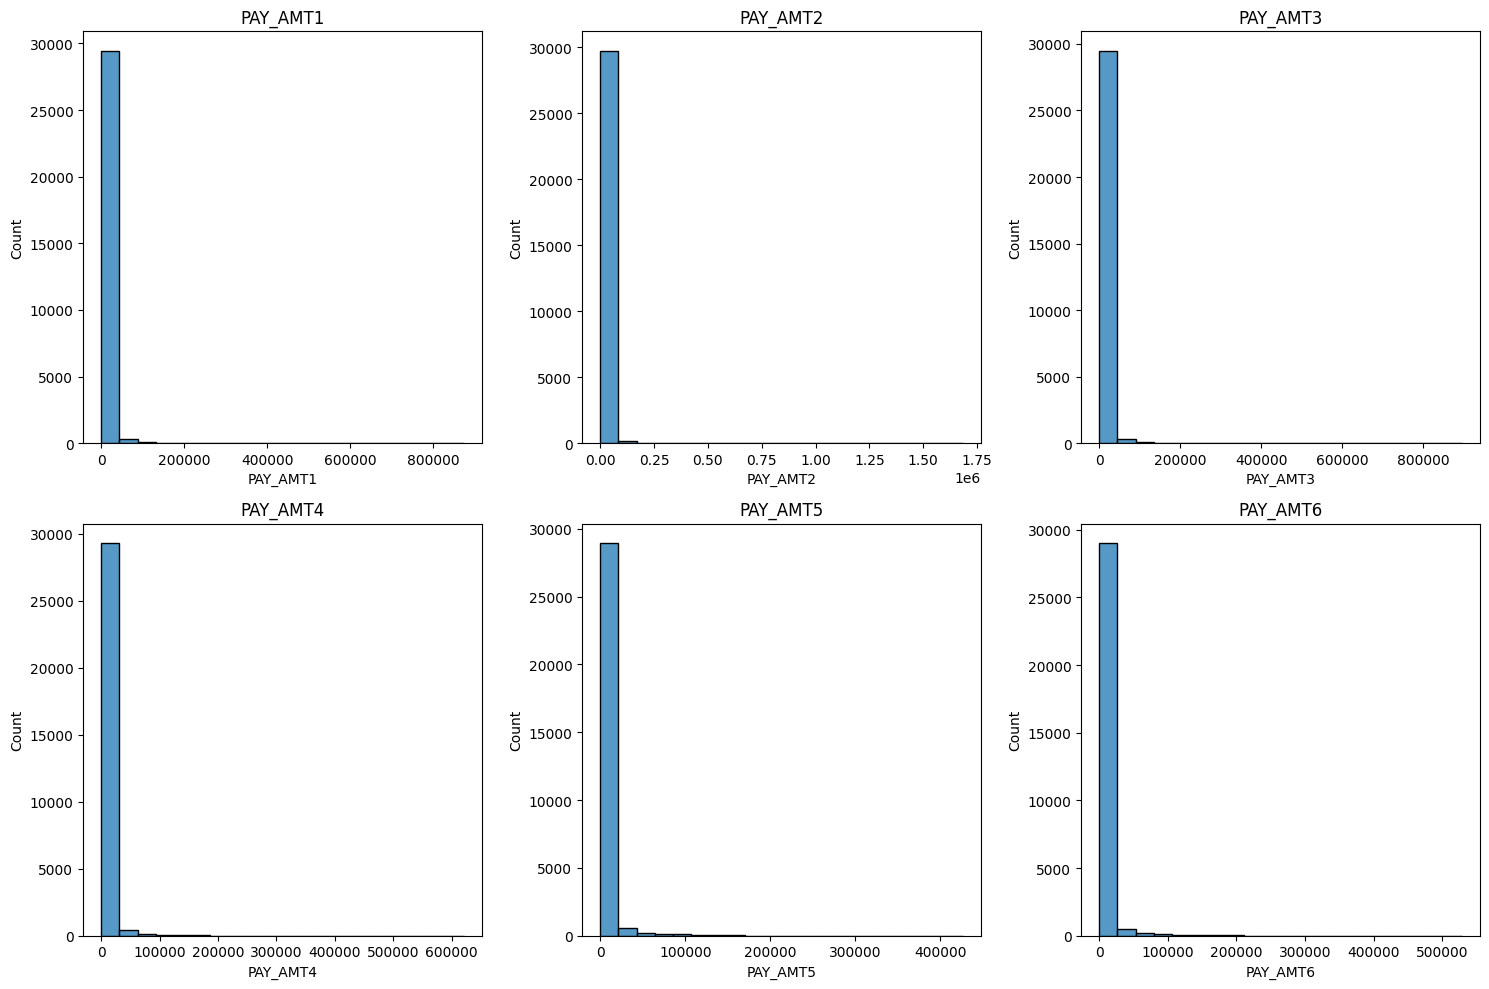

In [26]:
pay_amtx_fts = ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
pay = data[pay_amtx_fts]
draw_histograms(pay, pay.columns, 2, 3, 20)

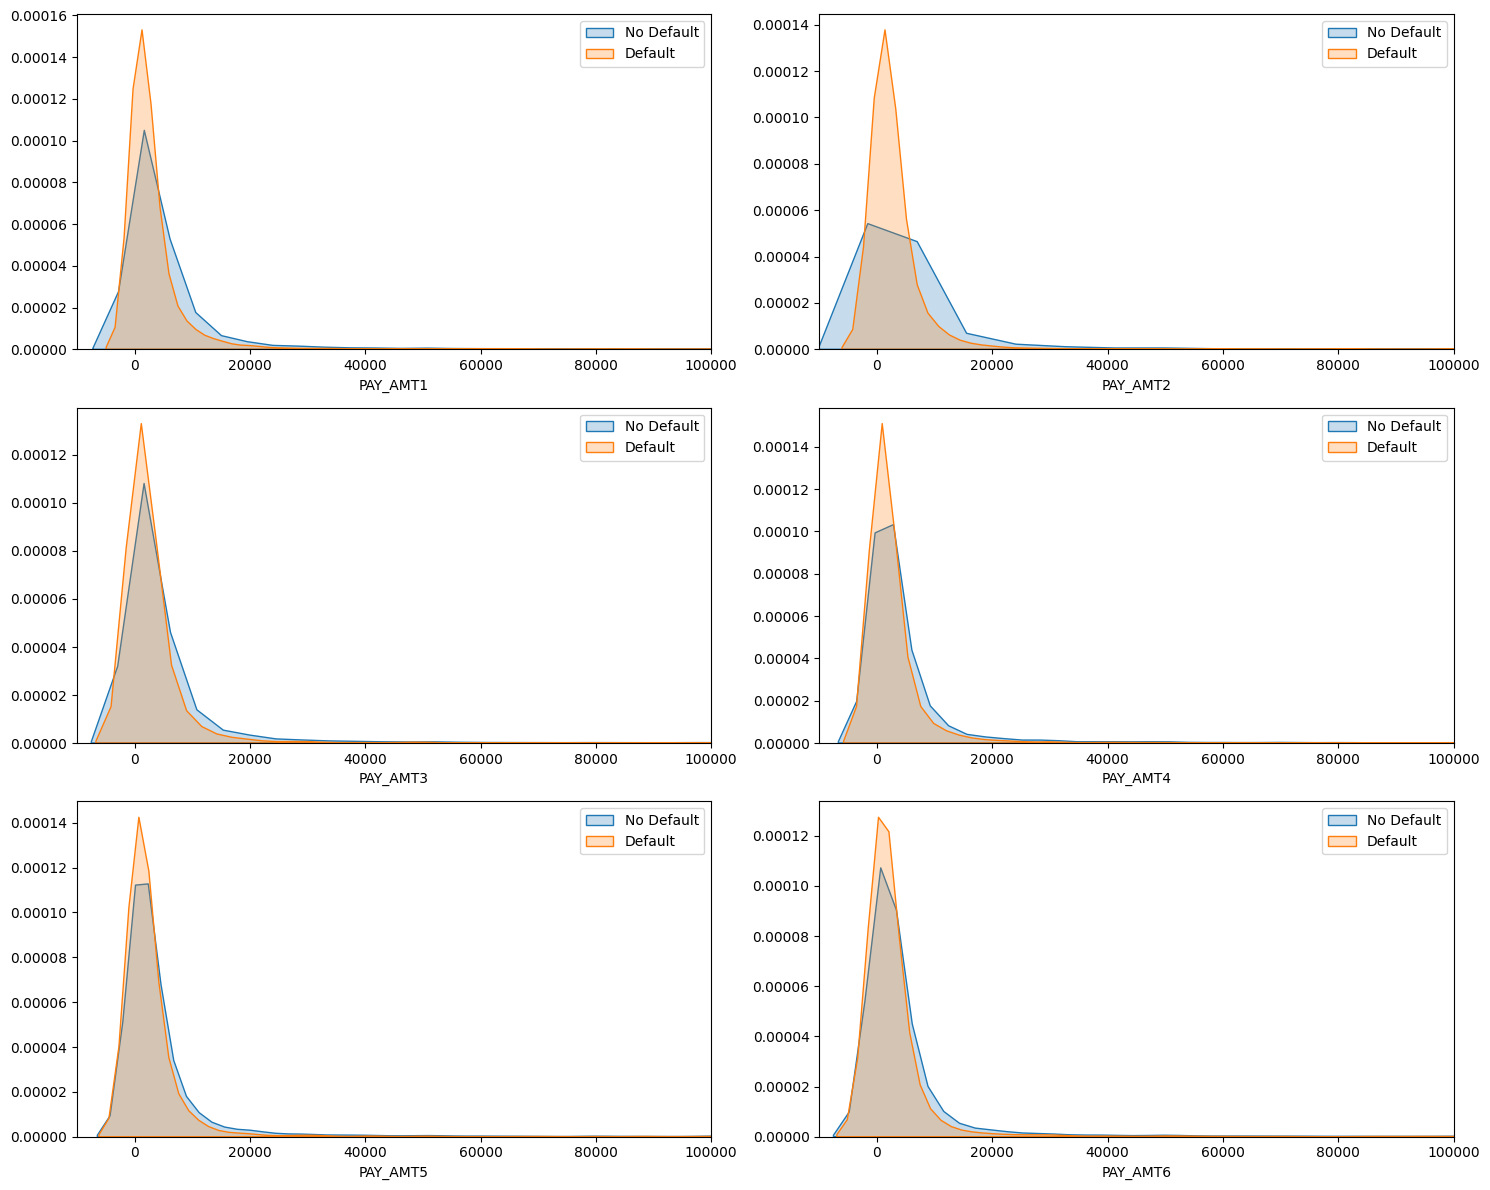

In [27]:
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_amtx_fts):
    plt.subplot(3,2,i + 1)
    sns.kdeplot(data.loc[(data['def_pay'] == 0), col], label = 'No Default', fill = True)
    sns.kdeplot(data.loc[(data['def_pay'] == 1), col], label = 'Default', fill = True)
    plt.xlim(-10000,100000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

plt.show()

In [28]:
data['PAY_AMT1_bin'] = data['PAY_AMT1'].copy()
data['PAY_AMT2_bin'] = data['PAY_AMT2'].copy()
data['PAY_AMT3_bin'] = data['PAY_AMT3'].copy()
data['PAY_AMT4_bin'] = data['PAY_AMT4'].copy()
data['PAY_AMT5_bin'] = data['PAY_AMT5'].copy()
data['PAY_AMT6_bin'] = data['PAY_AMT6'].copy()

In [29]:
pay_amtx_bins = ['PAY_AMT1_bin', 'PAY_AMT2_bin', 'PAY_AMT3_bin', 'PAY_AMT4_bin', 'PAY_AMT5_bin', 'PAY_AMT6_bin']

for i, col in enumerate (pay_amtx_bins):
    data[col] = pd.cut(data[pay_amtx_fts[i]],[-1, 0, 25000, 50000, 100000, 2000000])

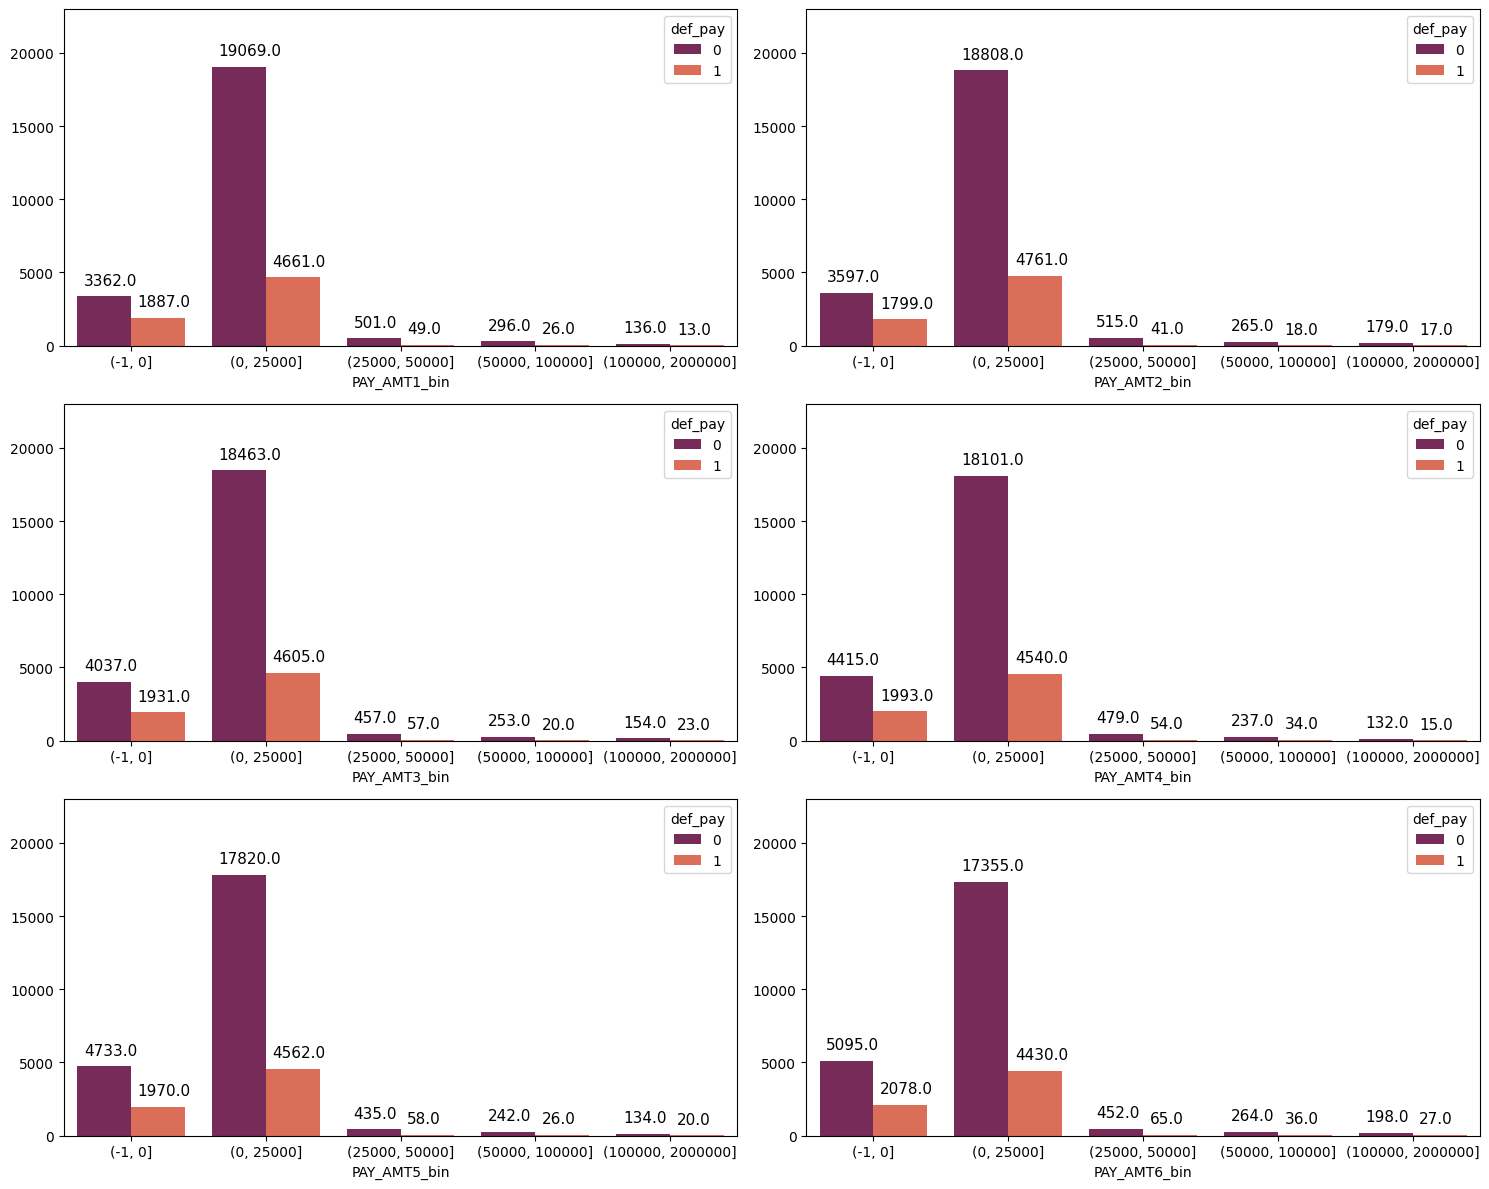

In [30]:
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_amtx_bins):
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(data = data, x = col, hue="def_pay", palette = 'rocket')
    plt.ylim(0,23000)
    plt.ylabel('')
    plt.tight_layout()

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.05, p.get_height()+800), fontsize=11)

plt.show()

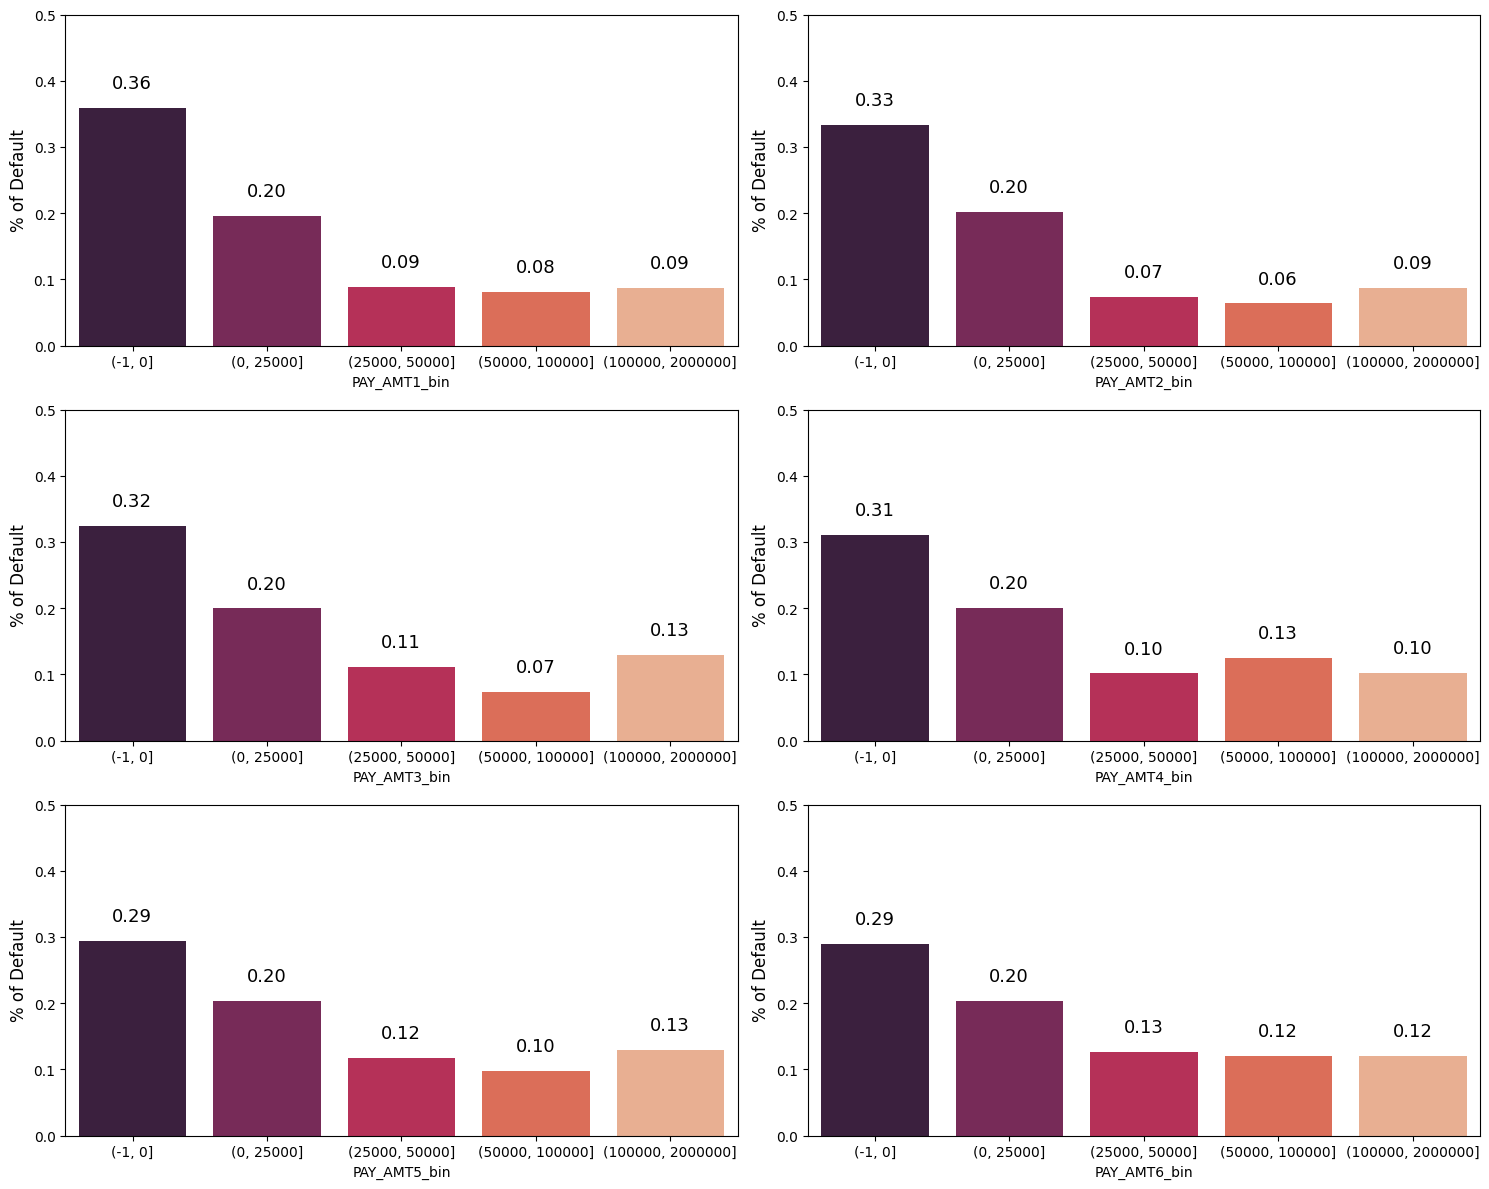

In [31]:
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_amtx_bins):
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "def_pay", data = data, palette = 'rocket', errorbar = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,0.5)
    plt.tight_layout()

    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

 Categorical Columns (SEX, EDUCATION, MARRIAGE)

SEX
   Value  Count  Percentage
1      1  11888   39.626667
2      2  18112   60.373333
--------------------------


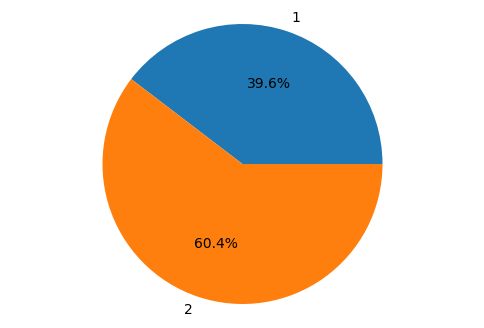

MARRIAGE
   Value  Count  Percentage
1      1  13659   45.530000
2      2  15964   53.213333
3      3    377    1.256667
--------------------------


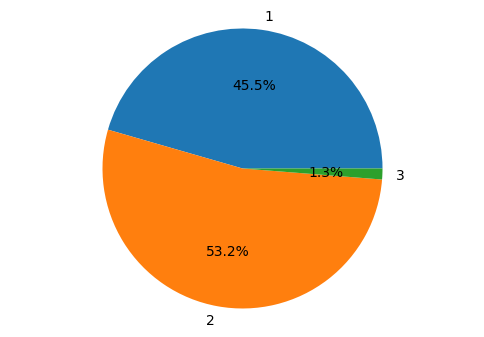

EDUCATION
   Value  Count  Percentage
1      1  10585   35.283333
2      2  14030   46.766667
3      3   4917   16.390000
4      4    468    1.560000
--------------------------


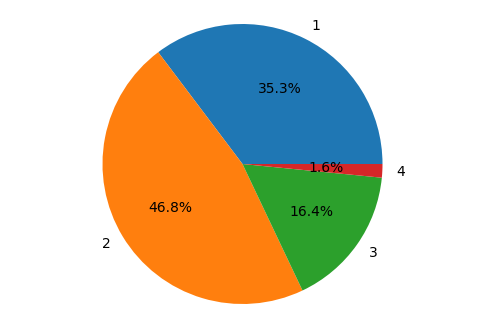

In [32]:
def show_value_counts(col):
    print(col)
    value_counts = data[col].value_counts()
    percentage = value_counts / len(data) * 100
    result_df = pd.DataFrame({'Value': value_counts.index, 'Count': value_counts, 'Percentage': percentage})
    result_df = result_df.sort_values(by='Value')
    print(result_df)
    print('--------------------------')
    generate_pie_plot(result_df)


def generate_pie_plot(data_frame):
    plt.figure(figsize=(6, 4))
    plt.pie(data_frame['Count'], labels=data_frame['Value'], autopct='%1.1f%%')
    plt.axis('equal')
    plt.show()

show_value_counts('SEX')
show_value_counts('MARRIAGE')
show_value_counts('EDUCATION')

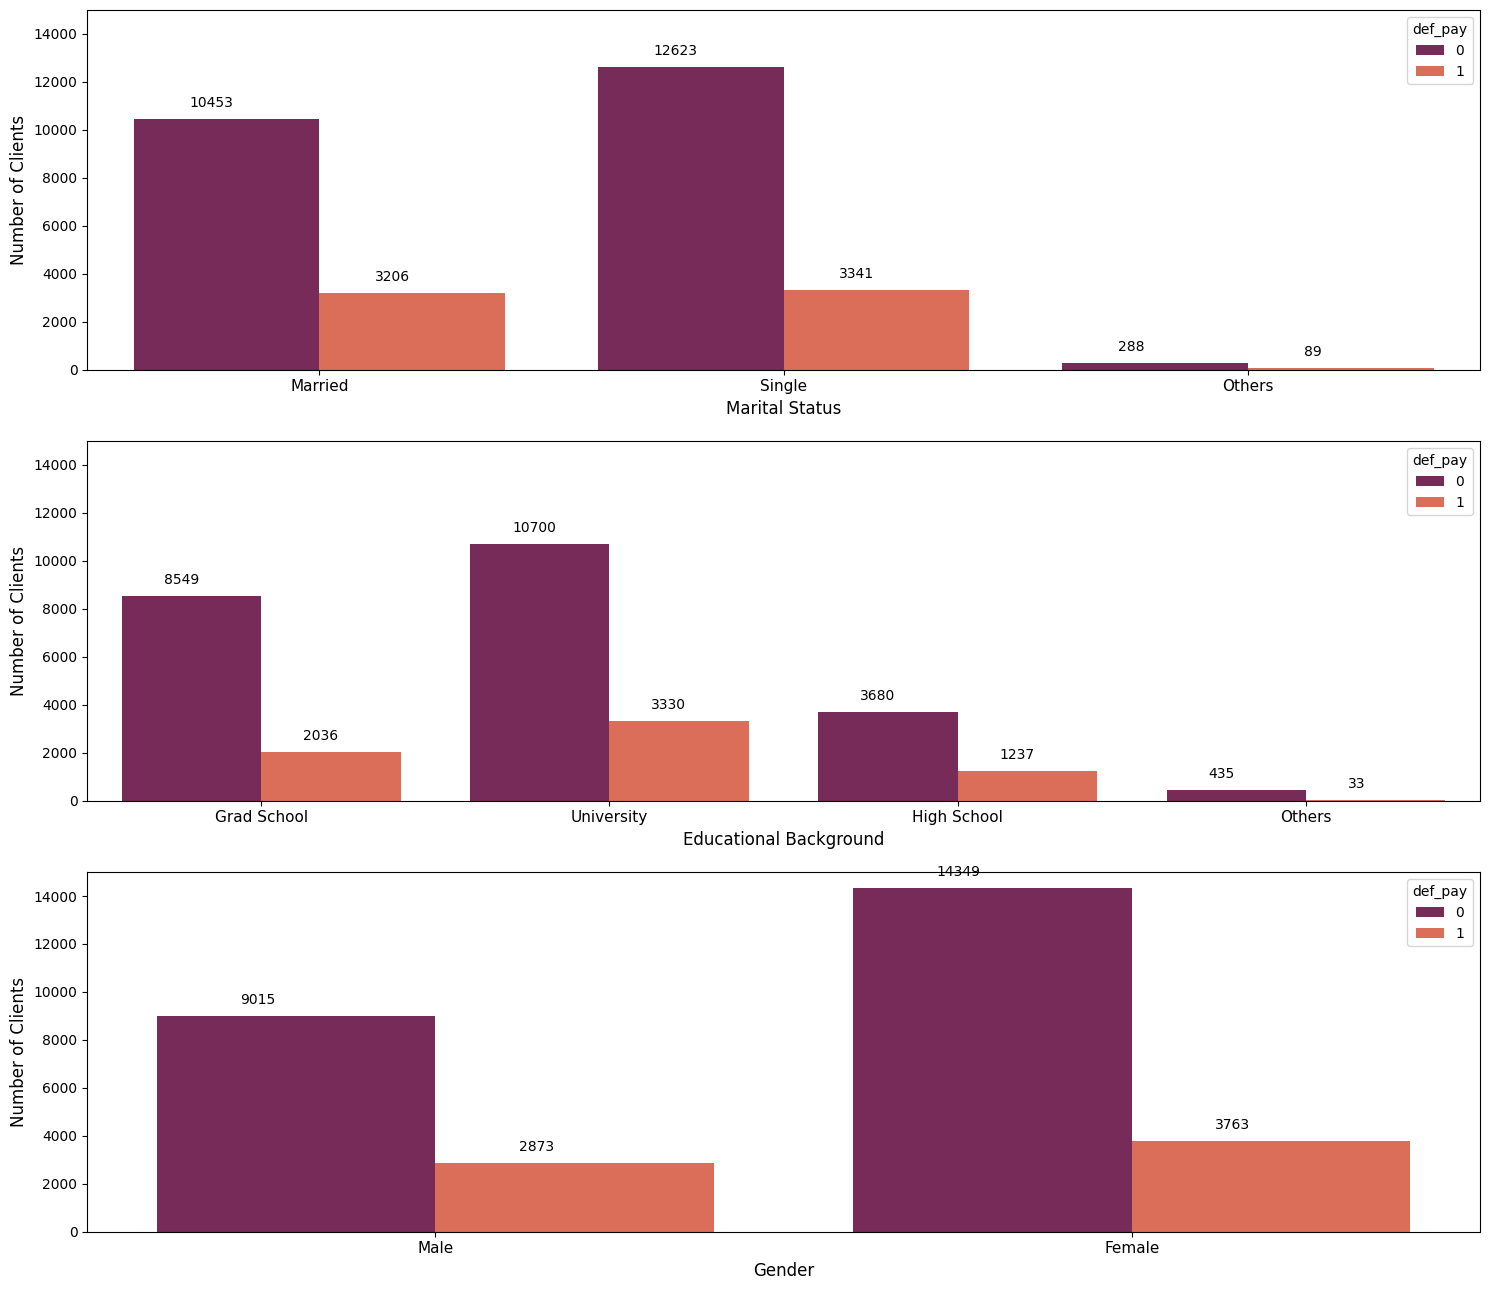

In [33]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 13))

# Count plot for MARRIAGE
ax1 = sns.countplot(data=data, x='MARRIAGE', hue='def_pay', palette='rocket', ax=axes[0])
ax1.set_xlabel("Marital Status", fontsize=12)
ax1.set_ylabel("Number of Clients", fontsize=12)
ax1.set_ylim(0, 15000)
ax1.set_xticks([0, 1, 2])
ax1.set_xticklabels(['Married', 'Single', 'Others'], fontsize=11)
for p in ax1.patches:
    ax1.annotate(int(p.get_height()), (p.get_x() + 0.12, p.get_height() + 500))

# Count plot for EDUCATION
ax2 = sns.countplot(data=data, x='EDUCATION', hue='def_pay', palette='rocket', ax=axes[1])
ax2.set_xlabel("Educational Background", fontsize=12)
ax2.set_ylabel("Number of Clients", fontsize=12)
ax2.set_ylim(0, 15000)
ax2.set_xticks([0, 1, 2, 3])
ax2.set_xticklabels(['Grad School', 'University', 'High School', 'Others'], fontsize=11)
for p in ax2.patches:
         ax2.annotate(int(p.get_height()), (p.get_x() + 0.12, p.get_height() + 500))

# Count plot for SEX
ax3 = sns.countplot(data=data, x='SEX', hue='def_pay', palette='rocket', ax=axes[2])
ax3.set_xlabel("Gender", fontsize=12)
ax3.set_ylabel("Number of Clients", fontsize=12)
ax3.set_ylim(0, 15000)
ax3.set_xticks([0, 1])
ax3.set_xticklabels(['Male', 'Female'], fontsize=11)
for p in ax3.patches:
    ax3.annotate(int(p.get_height()), (p.get_x() + 0.12, p.get_height() + 500))

plt.tight_layout()
plt.show()

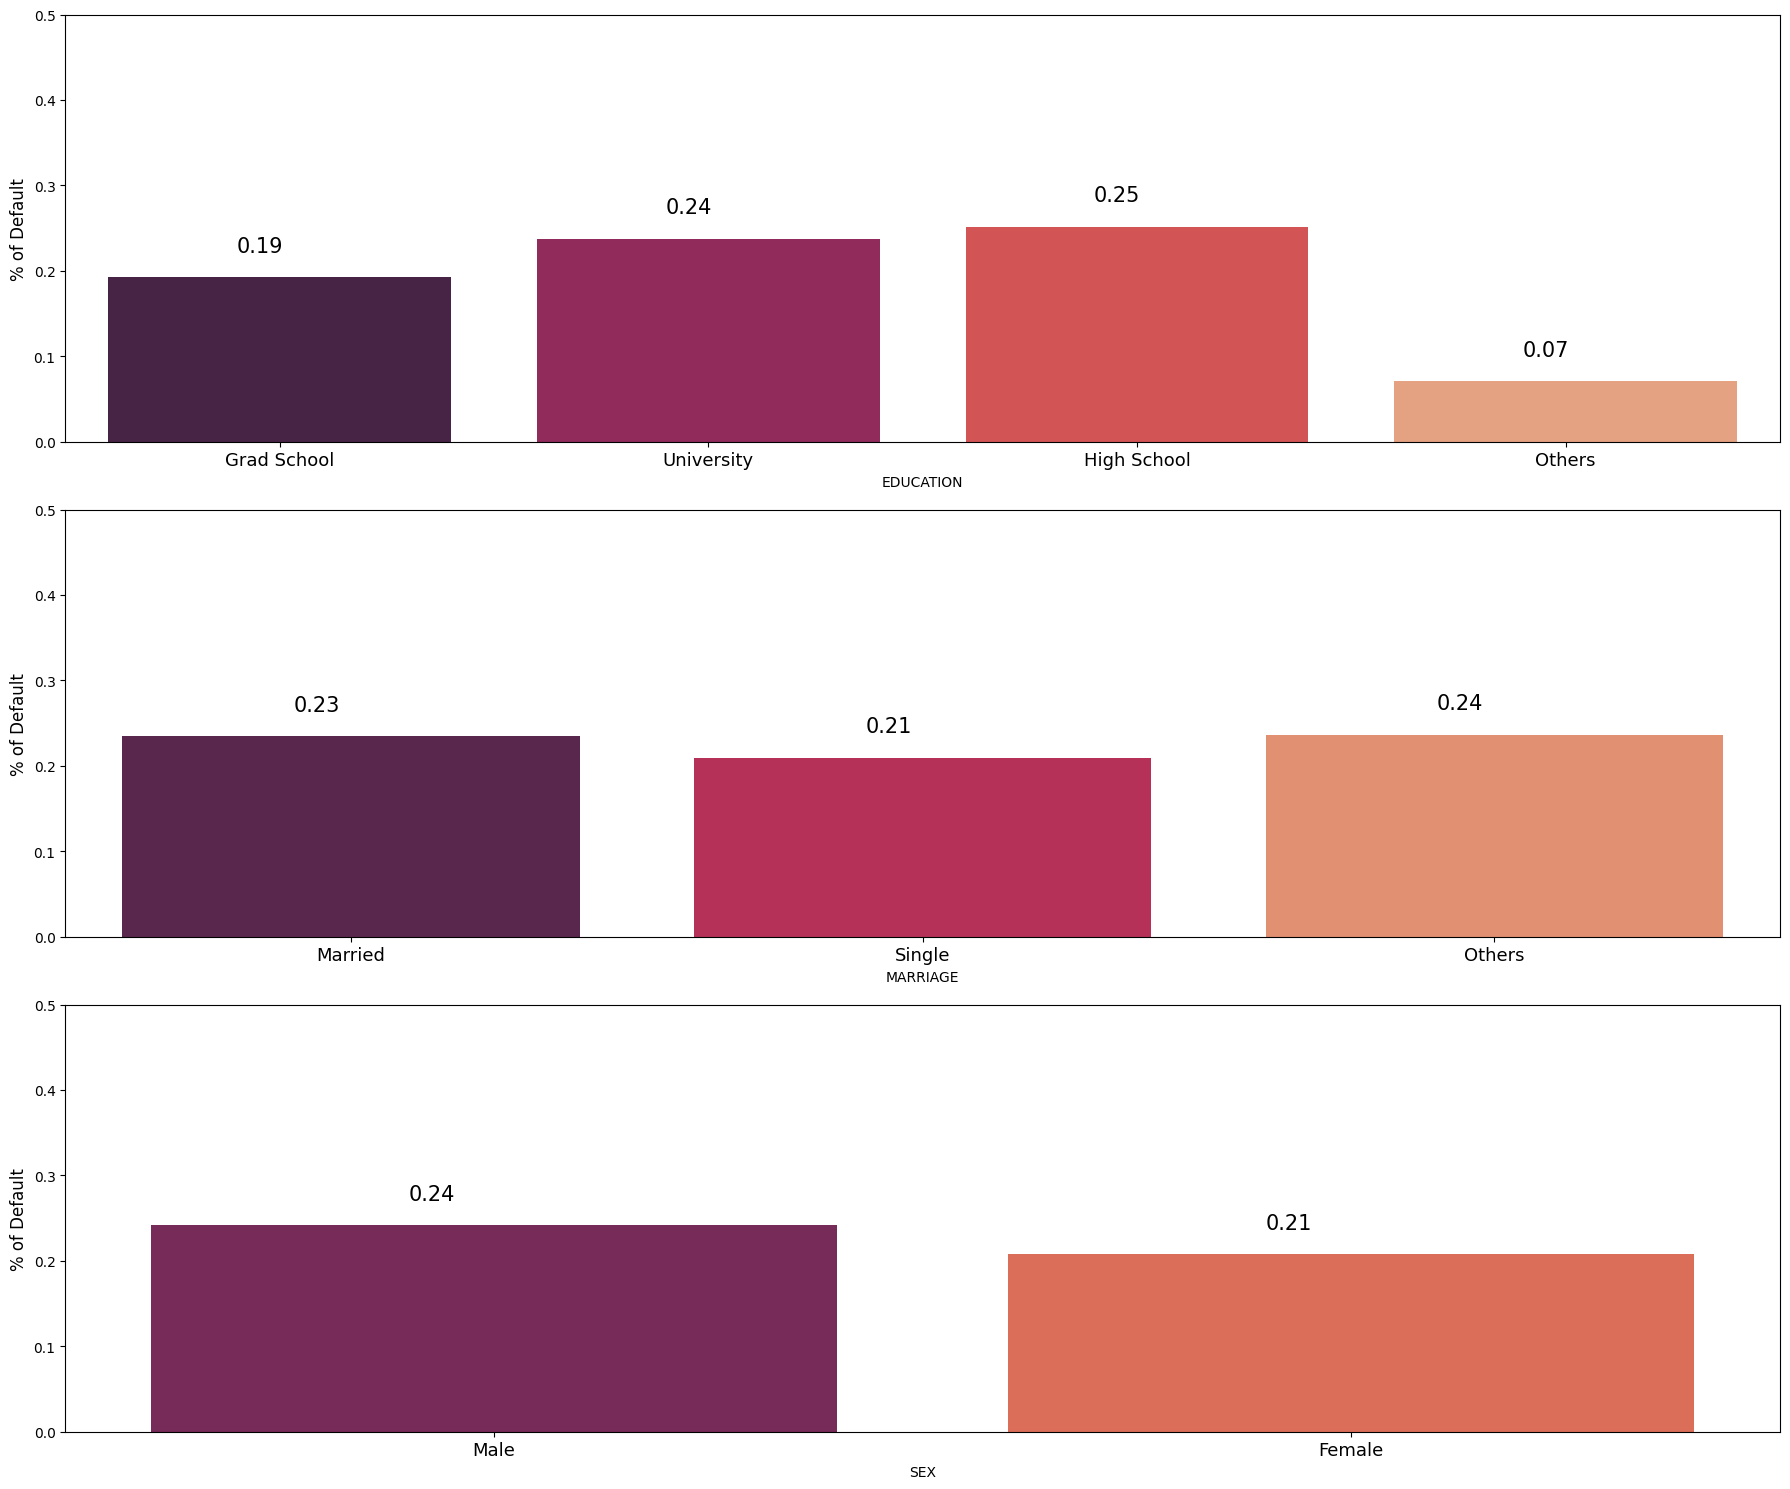

In [34]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(18, 15))

# Bar plot for EDUCATION
ax1 = sns.barplot(x="EDUCATION", y="def_pay", data=data, palette='rocket', errorbar=None, ax=axes[0])
ax1.set_ylabel("% of Default", fontsize=12)
ax1.set_ylim(0, 0.5)
ax1.set_xticks([0, 1, 2, 3])
ax1.set_xticklabels(['Grad School', 'University', 'High School', 'Others'], fontsize=13)
for p in ax1.patches:
    ax1.annotate("%.2f" % (p.get_height()), (p.get_x() + 0.30, p.get_height() + 0.03), fontsize=15)

# Bar plot for MARRIAGE
ax2 = sns.barplot(x="MARRIAGE", y="def_pay", data=data, palette='rocket', errorbar=None, ax=axes[1])
ax2.set_ylabel("% of Default", fontsize=12)
ax2.set_ylim(0, 0.5)
ax2.set_xticks([0,1,2])
ax2.set_xticklabels(['Married', 'Single', 'Others'], fontsize=13)
for p in ax2.patches:
     ax2.annotate("%.2f" % (p.get_height()), (p.get_x() + 0.30, p.get_height() + 0.03), fontsize=15)

# Bar plot for SEX
ax3 = sns.barplot(x="SEX", y="def_pay", data=data, palette='rocket', errorbar=None, ax=axes[2])
ax3.set_ylabel("% of Default", fontsize=12)
ax3.set_ylim(0, 0.5)
ax3.set_xticks([0, 1])
ax3.set_xticklabels(['Male', 'Female'], fontsize=13)
for p in ax3.patches:
    ax3.annotate("%.2f" % (p.get_height()), (p.get_x() + 0.30, p.get_height() + 0.03), fontsize=15)

plt.tight_layout()
plt.show()

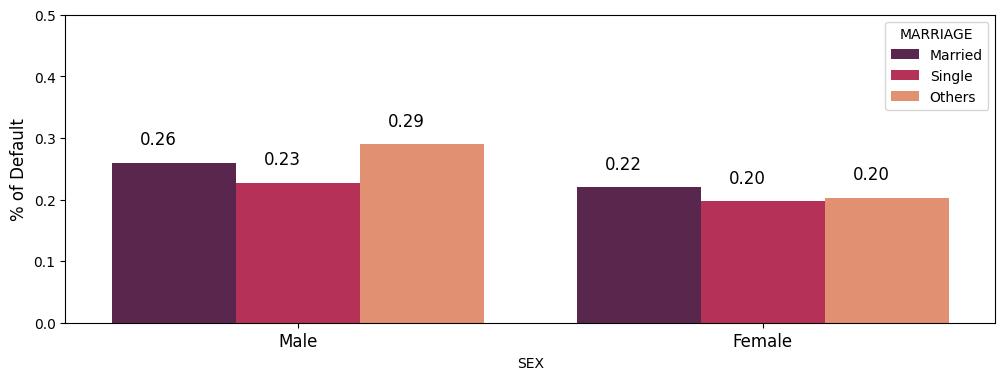

In [36]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "SEX", y = "def_pay", hue = "MARRIAGE", data = data, palette = 'rocket', errorbar = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)
plt.legend(['Married', 'Single','Others'], title = 'MARRIAGE')

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.06, p.get_height()+0.03),fontsize=12)

plt.show()

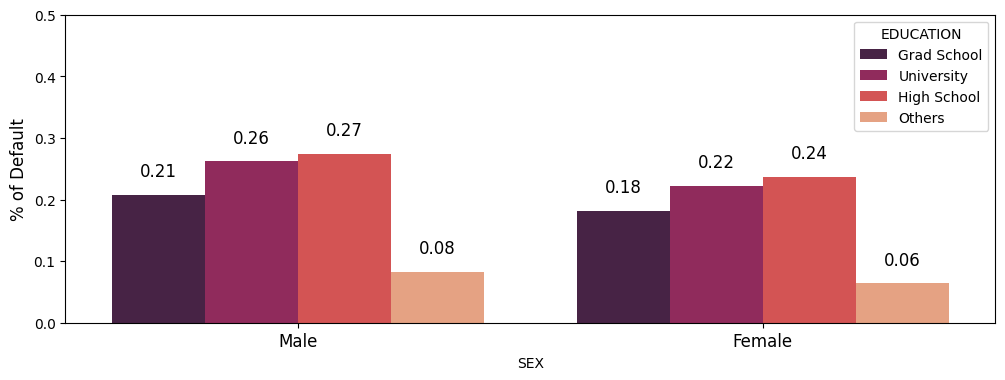

In [37]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "SEX", y = "def_pay", hue = "EDUCATION", data = data, palette = 'rocket', errorbar = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)
plt.legend(['Grad School', 'University', 'High School', 'Others'], title = 'EDUCATION')

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.06, p.get_height()+0.03),fontsize=12)

plt.show()

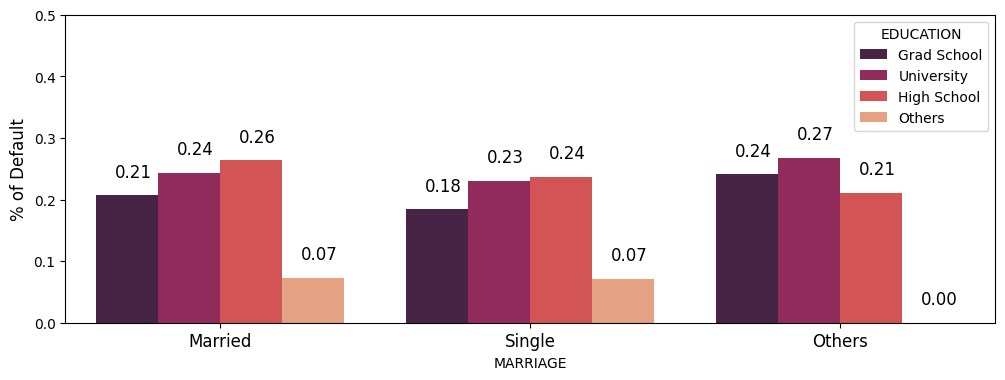

In [38]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "MARRIAGE", y = "def_pay", hue = "EDUCATION", data = data, palette = 'rocket', errorbar = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2],['Married', 'Single','Others'], fontsize = 12)
plt.legend(['Grad School', 'University', 'High School', 'Others'], title = 'EDUCATION')

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.06, p.get_height()+0.03),fontsize=12)

plt.show()


AGE COLUMN

<Axes: xlabel='AGE', ylabel='Count'>

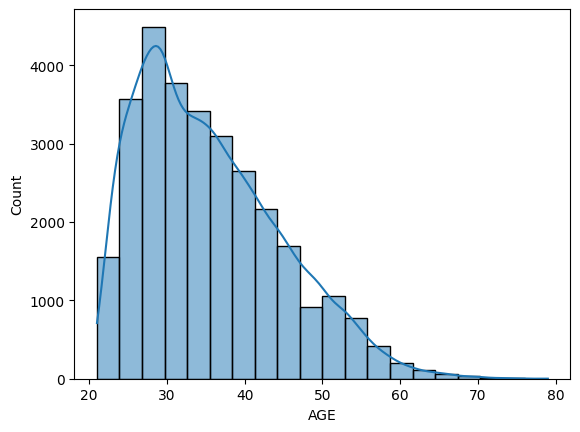

In [39]:
sns.histplot(data['AGE'],bins=20,kde=True)

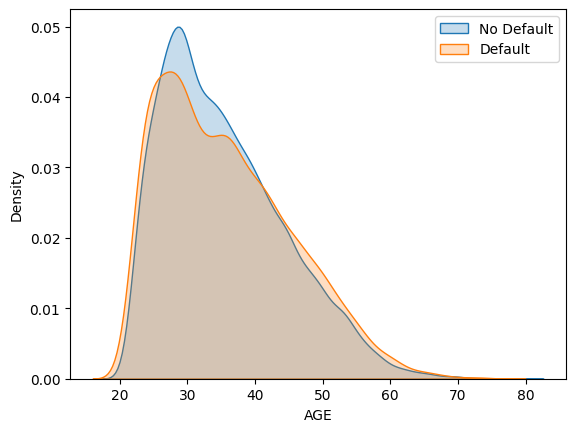

In [40]:
sns.kdeplot(data.loc[(data['def_pay'] == 0), 'AGE'], label = 'No Default', fill = True)
sns.kdeplot(data.loc[(data['def_pay'] == 1), 'AGE'], label = 'Default', fill = True)
plt.legend()
plt.show()

In [41]:
data['AgeBin'] = pd.cut(data['AGE'],[20, 25, 30, 35, 40, 50, 60, 80])
print(data['AgeBin'].value_counts())

(25, 30]    7142
(40, 50]    6005
(30, 35]    5796
(35, 40]    4917
(20, 25]    3871
(50, 60]    1997
(60, 80]     272
Name: AgeBin, dtype: int64


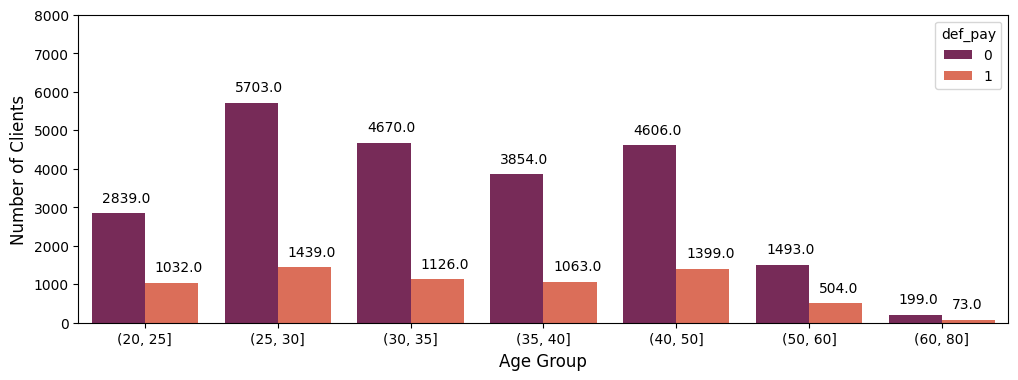

In [42]:
plt.figure(figsize=(12,4))

data['AgeBin'] = data['AgeBin'].astype('str')
AgeBin_order = ['(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 50]', '(50, 60]', '(60, 80]']

ax = sns.countplot(data = data, x = 'AgeBin', hue="def_pay", palette = 'rocket', order = AgeBin_order)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("Number of Clients", fontsize= 12)
plt.ylim(0,8000)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.show()

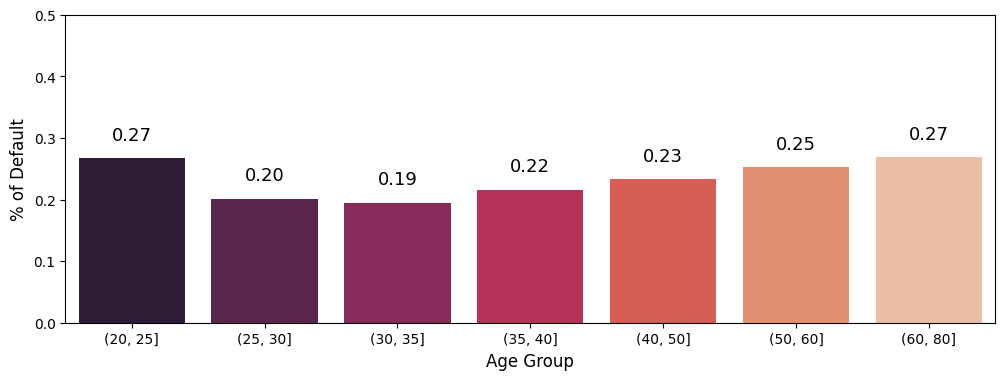

In [43]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "AgeBin", y = "def_pay", data = data, palette = 'rocket', errorbar = None, order = AgeBin_order)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

 LIMIT BALANCE COLUMN (LIMIT_BAL)

<Axes: xlabel='LIMIT_BAL', ylabel='Count'>

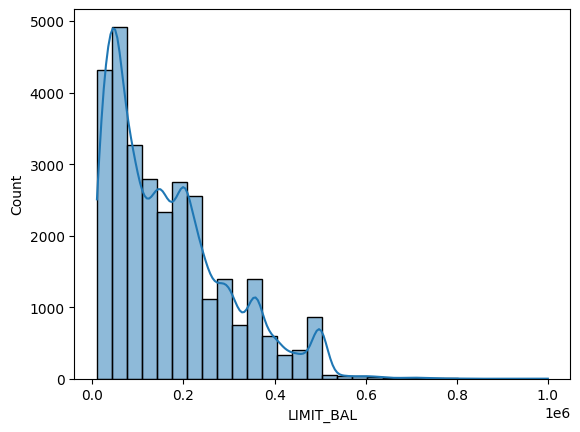

In [44]:
sns.histplot(data['LIMIT_BAL'],bins=30,kde=True)

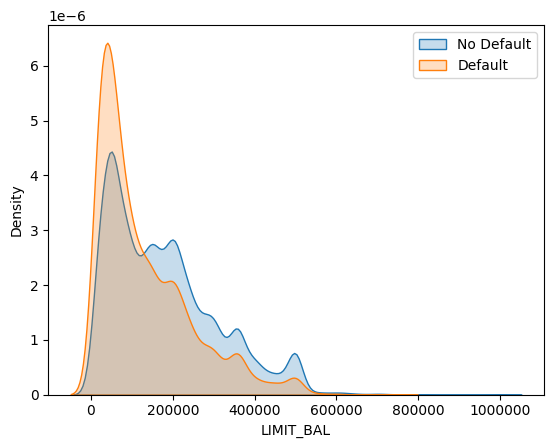

In [45]:
sns.kdeplot(data.loc[(data['def_pay'] == 0), 'LIMIT_BAL'], label = 'No Default', fill = True)
sns.kdeplot(data.loc[(data['def_pay'] == 1), 'LIMIT_BAL'], label = 'Default', fill = True)
plt.ticklabel_format(style='plain', axis='x')
plt.legend()
plt.show()

In [46]:
data['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [48]:
data['LimitBin'] = pd.cut(data['LIMIT_BAL'],[5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000])
print(data['LimitBin'].value_counts())

(5000, 50000]        7676
(200000, 300000]     5059
(50000, 100000]      4822
(150000, 200000]     3978
(100000, 150000]     3902
(300000, 400000]     2759
(400000, 500000]     1598
(500000, 1100000]     206
Name: LimitBin, dtype: int64


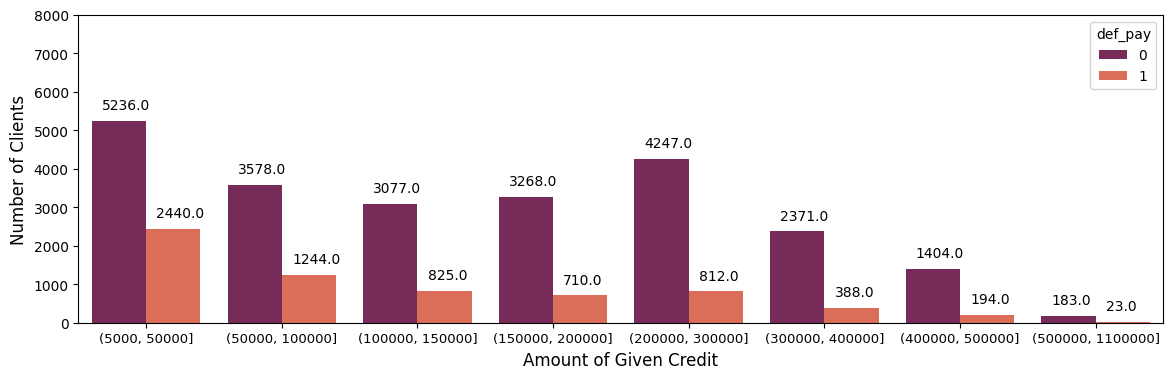

In [49]:
plt.figure(figsize=(14,4))

data['LimitBin'] = data['LimitBin'].astype('str')
LimitBin_order = ['(5000, 50000]', '(50000, 100000]', '(100000, 150000]', '(150000, 200000]',
                '(200000, 300000]', '(300000, 400000]', '(400000, 500000]', '(500000, 1100000]']

ax = sns.countplot(data = data, x = 'LimitBin', hue="def_pay", palette = 'rocket', order = LimitBin_order)

plt.xlabel("Amount of Given Credit", fontsize= 12)
plt.ylabel("Number of Clients", fontsize= 12)
plt.ylim(0,8000)
ax.tick_params(axis="x", labelsize= 9.5)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.show()

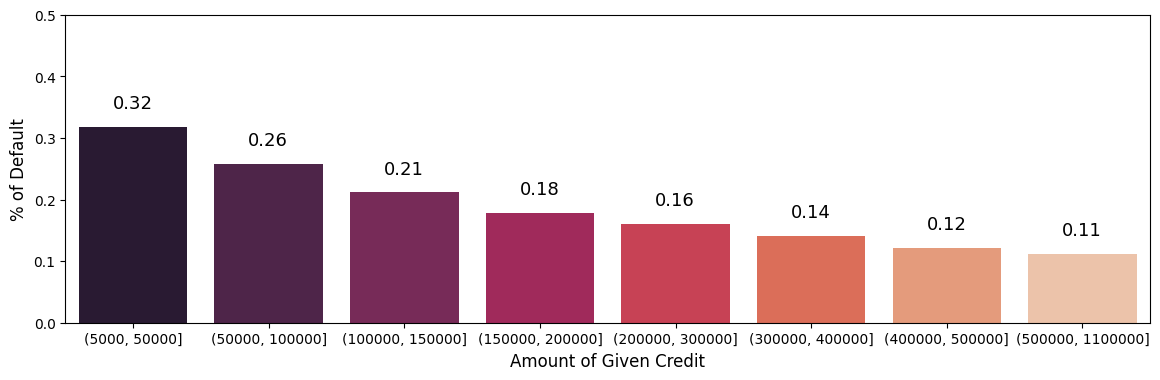

In [50]:
plt.figure(figsize=(14,4))

ax = sns.barplot(x = "LimitBin", y = "def_pay", data = data, palette = 'rocket', errorbar = None, order = LimitBin_order)

plt.xlabel("Amount of Given Credit", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

In [51]:
# Group by and calculate mean for each category
mean_by_sex = data.groupby('SEX')['LIMIT_BAL'].mean()
mean_by_education = data.groupby('EDUCATION')['LIMIT_BAL'].mean()
mean_by_marriage = data.groupby('MARRIAGE')['LIMIT_BAL'].mean()
mean_by_age_bin = data.groupby('AgeBin')['LIMIT_BAL'].mean()

In [52]:
print("Mean LIMIT_BAL by SEX:")
print(mean_by_sex)

print('----------------------')
print("\nMean LIMIT_BAL by EDUCATION:")
print(mean_by_education)

print('----------------------')
print("\nMean LIMIT_BAL by MARRIAGE:")
print(mean_by_marriage)

print('----------------------')
print("\nMean LIMIT_BAL by AGE_BIN:")
print(mean_by_age_bin)

Mean LIMIT_BAL by SEX:
SEX
1    163519.825034
2    170086.462014
Name: LIMIT_BAL, dtype: float64
----------------------

Mean LIMIT_BAL by EDUCATION:
EDUCATION
1    212956.069910
2    147062.437634
3    126550.270490
4    181316.239316
Name: LIMIT_BAL, dtype: float64
----------------------

Mean LIMIT_BAL by MARRIAGE:
MARRIAGE
1    182200.893184
2    156413.660737
3    103076.923077
Name: LIMIT_BAL, dtype: float64
----------------------

Mean LIMIT_BAL by AGE_BIN:
AgeBin
(20, 25]     73763.885301
(25, 30]    164320.918510
(30, 35]    197688.060732
(35, 40]    196780.557250
(40, 50]    179680.213156
(50, 60]    159349.023535
(60, 80]    201617.647059
Name: LIMIT_BAL, dtype: float64


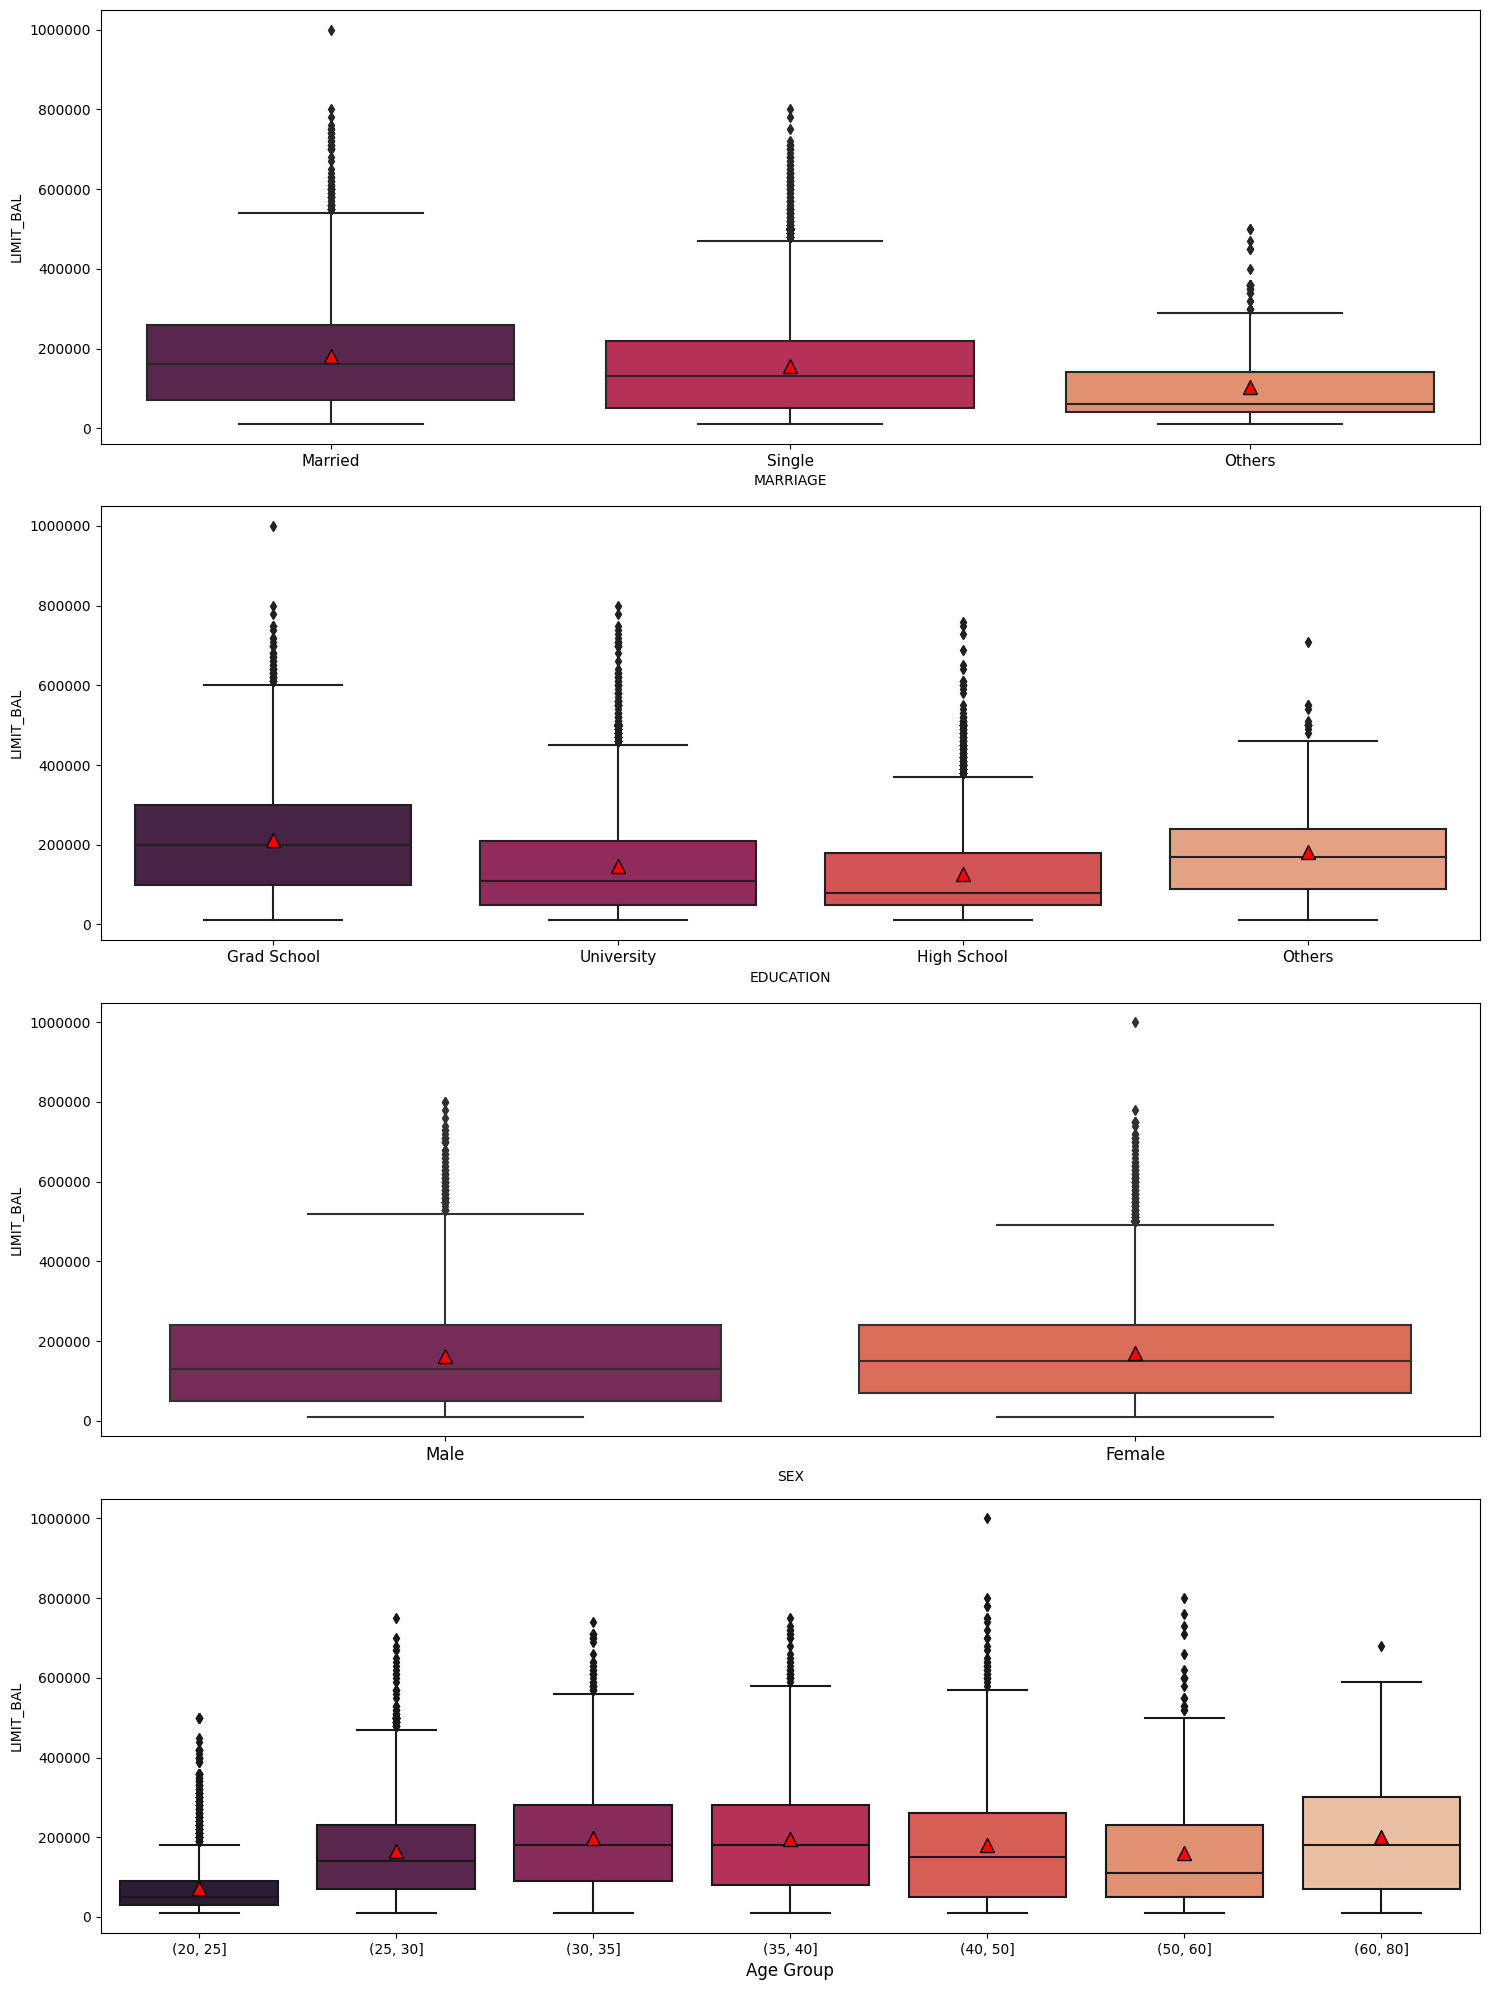

In [53]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 1, 1)
sns.boxplot(x="MARRIAGE", y="LIMIT_BAL", data=data, palette='rocket', showmeans=True,
            meanprops={"markerfacecolor": "red", "markeredgecolor": "black", "markersize": "10"})
plt.ticklabel_format(style='plain', axis='y')
plt.xticks([0, 1, 2], ['Married', 'Single', 'Others'], fontsize=11)


plt.subplot(4, 1, 2)
sns.boxplot(x="EDUCATION", y="LIMIT_BAL", data=data, palette='rocket', showmeans=True,
            meanprops={"markerfacecolor": "red", "markeredgecolor": "black", "markersize": "10"})
plt.ticklabel_format(style='plain', axis='y')
plt.xticks([0, 1, 2, 3], ['Grad School', 'University', 'High School', 'Others'], fontsize=11)

plt.subplot(4, 1, 3)
sns.boxplot(x="SEX", y="LIMIT_BAL", data=data, palette='rocket', showmeans=True,
            meanprops={"markerfacecolor": "red", "markeredgecolor": "black", "markersize": "10"})
plt.ticklabel_format(style='plain', axis='y')
plt.xticks([0, 1], ['Male', 'Female'], fontsize=12)

plt.subplot(4, 1, 4)
sns.boxplot(x="AgeBin", y="LIMIT_BAL", data=data, palette='rocket', showmeans=True, order=AgeBin_order,
            meanprops={"markerfacecolor": "red", "markeredgecolor": "black", "markersize": "10"})
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("Age Group", fontsize=12)

plt.tight_layout()
plt.show()

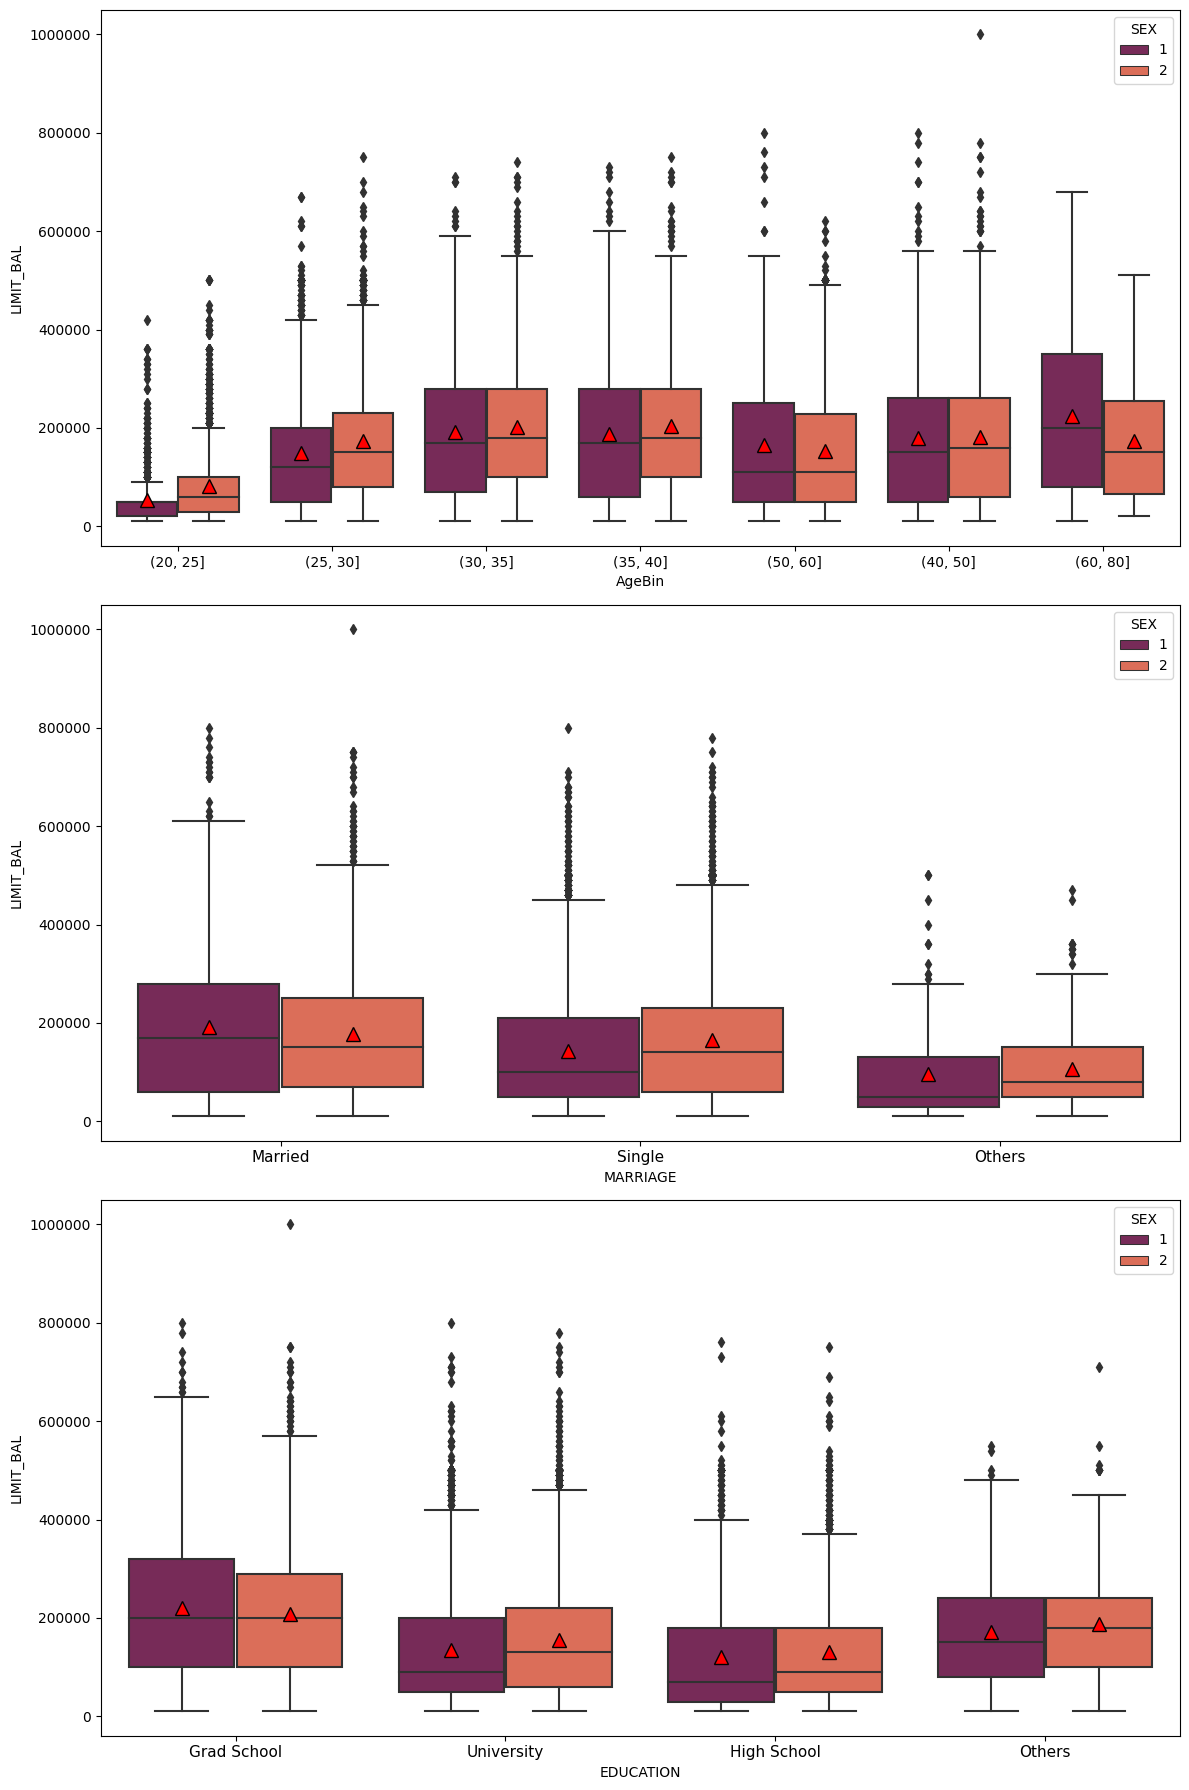

In [55]:
plt.figure(figsize=(12, 18))

# Subplot for AgeBin
plt.subplot(3, 1, 1)
sns.boxplot(x="AgeBin", y="LIMIT_BAL", hue='SEX', data=data, palette='rocket', showmeans=True,
            meanprops={"markerfacecolor": "red", "markeredgecolor": "black", "markersize": "10"})
plt.ticklabel_format(style='plain', axis='y')


# Subplot for Marriage
plt.subplot(3, 1, 2)
sns.boxplot(x="MARRIAGE", y="LIMIT_BAL", hue='SEX', data=data, palette='rocket', showmeans=True,
            meanprops={"markerfacecolor": "red", "markeredgecolor": "black", "markersize": "10"})
plt.ticklabel_format(style='plain', axis='y')
plt.xticks([0, 1, 2], ['Married', 'Single','Others'], fontsize=11)

# Subplot for Education
plt.subplot(3, 1, 3)
sns.boxplot(x="EDUCATION", y="LIMIT_BAL", hue='SEX', data=data, palette='rocket', showmeans=True,
            meanprops={"markerfacecolor": "red", "markeredgecolor": "black", "markersize": "10"})
plt.ticklabel_format(style='plain', axis='y')
plt.xticks([0, 1, 2, 3], ['Grad School', 'University', 'High School', 'Others'], fontsize=11)


plt.tight_layout()
plt.show()

Correlation

<ipython-input-56-9f428df20dcb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),square=True,cmap='coolwarm')


<Axes: >

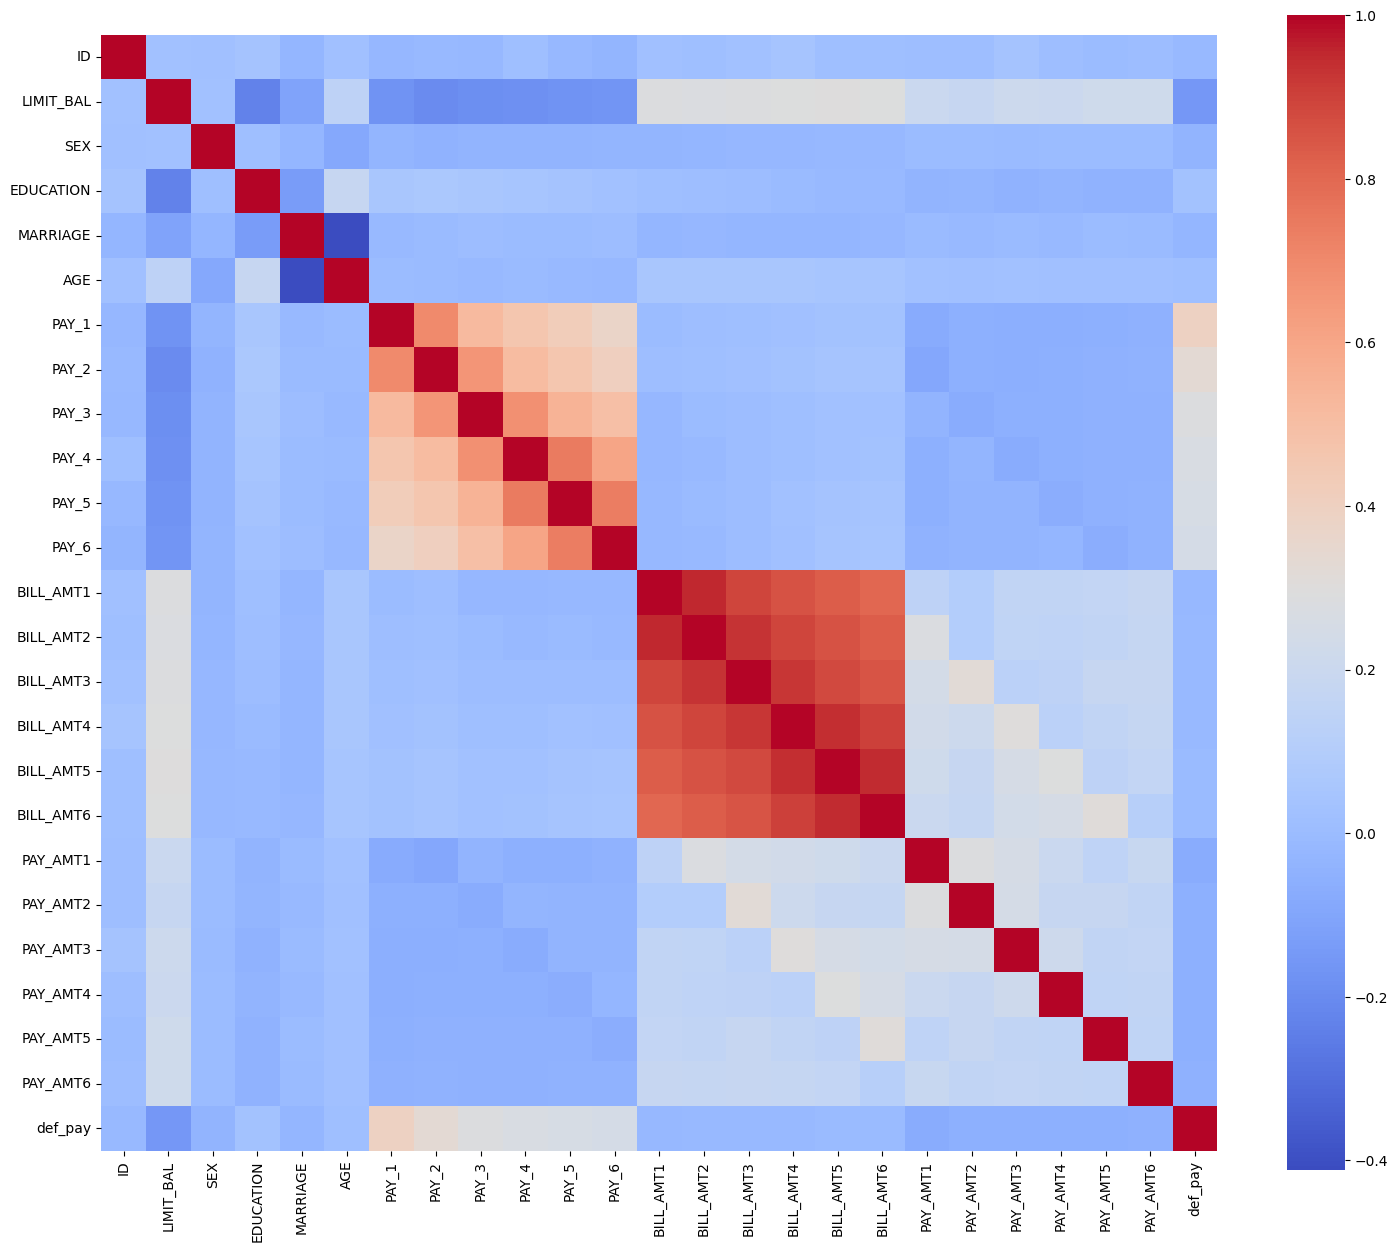

In [56]:
plt.figure(figsize=(18,15))
sns.heatmap(data.corr(),square=True,cmap='coolwarm')

Analysis Summary

The following is the behaviour of dataset columns with default column:

Repayment Behavior:

Individuals with a history of payment delays for more than 4 months have a significantly high chance of default, approximately 70%.

Bill Statement:

Individuals with negative bill statements (credit balance) are less likely to default

Previous Payment Amounts:

Individuals with very low previous payment amounts, nearly 0, have a higher likelihood of default, around 30%.

Education Level:

As the education level decreases, the limit balance also decreases, and the chance of default increases

Marital Status:

Individuals with marital status "Others" (possibly divorced) have a notably higher chance of default, approximately 30

Age Group:

People belonging to the age group of 20 to 25 and above 50 have a higher likelihood of default, around 27%.

Credit Limit:

Individuals with higher credit limits are less prone to default, while those with credit limits below 50k dollars have a high likelihood of default, almost 32%